**INN Hotel Booking Data**
--

## Problem Statement

**Context**
- A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

- The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.



**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.



**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**:

`Booking_ID`: the unique identifier of each booking

`no_of_adults`: Number of adults

`no_of_children`: Number of Children

`no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

`no_of_week_nights`: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

`type_of_meal_plan`: Type of meal plan booked by the customer:

Not Selected - No meal plan selected

Meal Plan 1 - Breakfast

Meal Plan 2 - Half board (breakfast and one other meal)

Meal Plan 3 - Full board (breakfast, lunch, and dinner)


`required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)

`room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

`lead_time`: Number of days between the date of booking and the arrival date

`arrival_year`: Year of arrival date

`arrival_month`: Month of arrival date

`arrival_date`: Date of the month

`market_segment_type`: Market segment designation.

`repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)

`no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking

`no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking

`avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

`no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

`booking_status`: Flag indicating if the booking was canceled or not.

**EDA Questions**

1. What are the busiest months in the hotel?

2.   Which market segment do most of the guests come from?
3.   Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

4.   What percentage of bookings are canceled?
5.   Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6.   Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Note**: These are a few questions to help guide you in performing EDA. EDA has to be done beyond this set of questions to obtain the maximum point in the corresponding rubric section.

## Loading Libraries

In [101]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

## Loading data

In [102]:

# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files

data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Python_Files/INNHotelsGroup.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [292]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Overview of the data

### View the first and last 5 rows of the dataset.

In [104]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [105]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### Understand the shape of the dataset.

In [106]:
df.shape

(36275, 19)

### Check the data types of the columns for the dataset.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Dependent variable is the booking status which is of categorical type.
* Booking id, meal plan type, room reservation type, and market segment are of categorical and market segment is float type while other variables are of integer type.
* There are no missing values in the dataset.

### Checking for duplicate values

In [108]:
df.duplicated().sum()

0

- There are no duplicate values in the dataset.

### Checking for missing values

In [109]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


- There are no null values in the dataset.

### Statistical summary

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* `no_of_week_nights`: Average no of week nights are 2.2. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `lead_time`: The mean number of days between the date of booking and the arrival date is 85.23. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `avg_price_per_room`: The average price per room is 103.42 in euros. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `No_of_previous_booking_not_cancelled`: There's a huge difference in the 75th percentile and maximum value of No_of_previous_booking_not_cancelled indicating the presence of outliers. Also, 75% of the observations are 0.
* `no_of_previous_cancelled`: Same as no_of_previous_cancelled there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `repeated_guest`: Same as repeated_guest there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `car_parking_space`: Same as car_parking_space there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `no_of_children`: Same as no_of_children there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.

## Find out unique values in each categorical column

In [111]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [112]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [113]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [114]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

- There are six different types of rooms available.
- Meal plans come in three types, with an option for guests to not select a meal plan.
- There are five different market segments.
- Booking statuses are either cancelled or not cancelled.

In [115]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

In [116]:
df['no_of_previous_bookings_not_canceled'].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36])

## Exploratory Data Analysis (EDA) Summary

In [117]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [118]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [119]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentiles

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Crosstab for counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Crosstab for normalized (percentile) values
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plotting
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Annotate with percentiles
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()
        if height > 0:
            ax.annotate(f'{height*100:.1f}%', (x + width / 2, y + height / 2),
                        ha='center', va='center', fontsize=10, color='white')

    plt.show()

In [120]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on no of adults

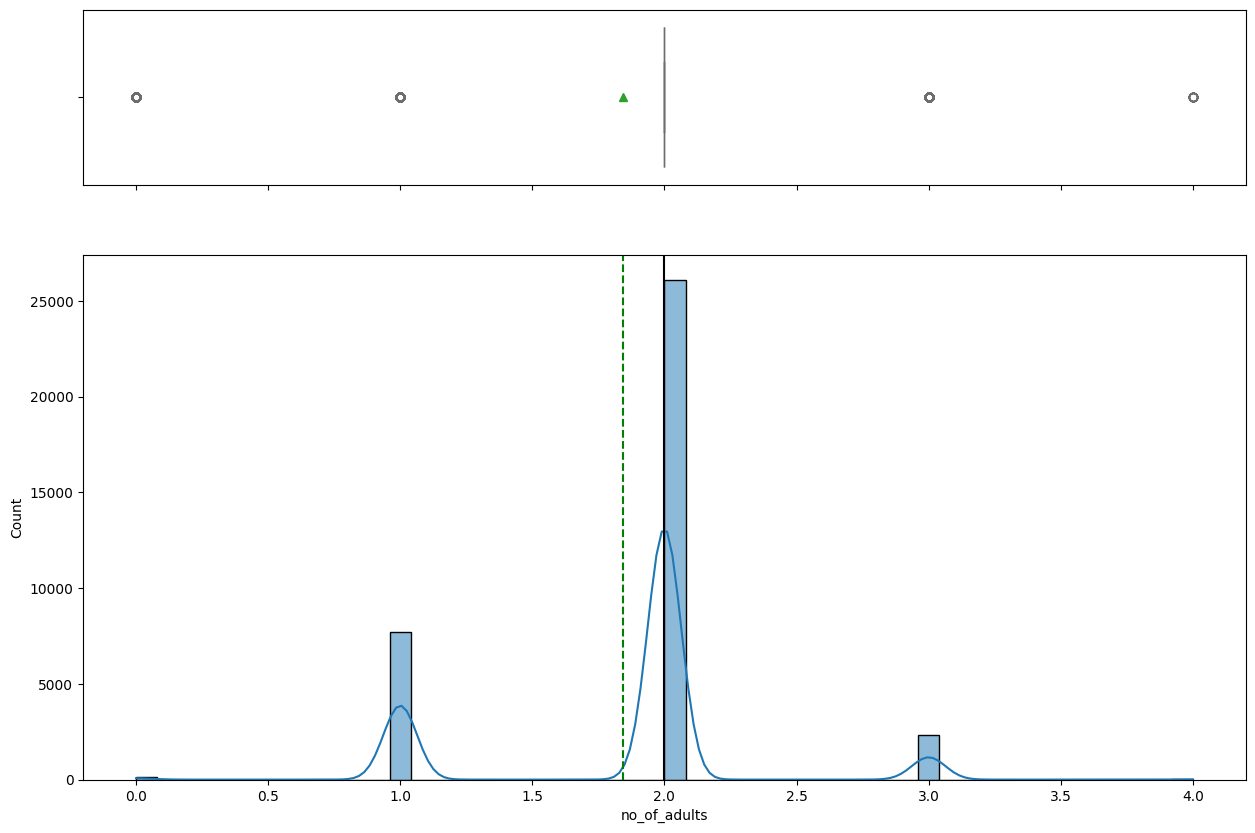

In [121]:
histogram_boxplot(df, "no_of_adults", bins=50)

- The majority of bookings were for two adults, totaling over 25,000.
- Bookings for three adults were minimal (around 2,500), and bookings for one adult were about 7,500.
- The boxplot indicates that bookings with zero, one, and three adults are outliers.
- It's important to investigate the reasons behind bookings with zero adults.

In [122]:
rows_with_zero_adults = df[df['no_of_adults'] == 0]
print('There are', rows_with_zero_adults.shape[0] ,'no of records having booking with zero adults.')

There are 139 no of records having booking with zero adults.


- Now we will try to check if there is any booking made by children for those booking where there is no record of adults.

In [123]:
rows_with_zero_adults['no_of_children'].unique()

array([2, 1, 3])

- It is clear the zero no of adult's booking has some influence of children.
- We must check if those bookings were cancelled or not.

In [124]:
rows_with_zero_adults['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.683453
Canceled,0.316547


- This tells us around 31 percentile of the booking with zero adults got cancelled.

#### Observations on no of children

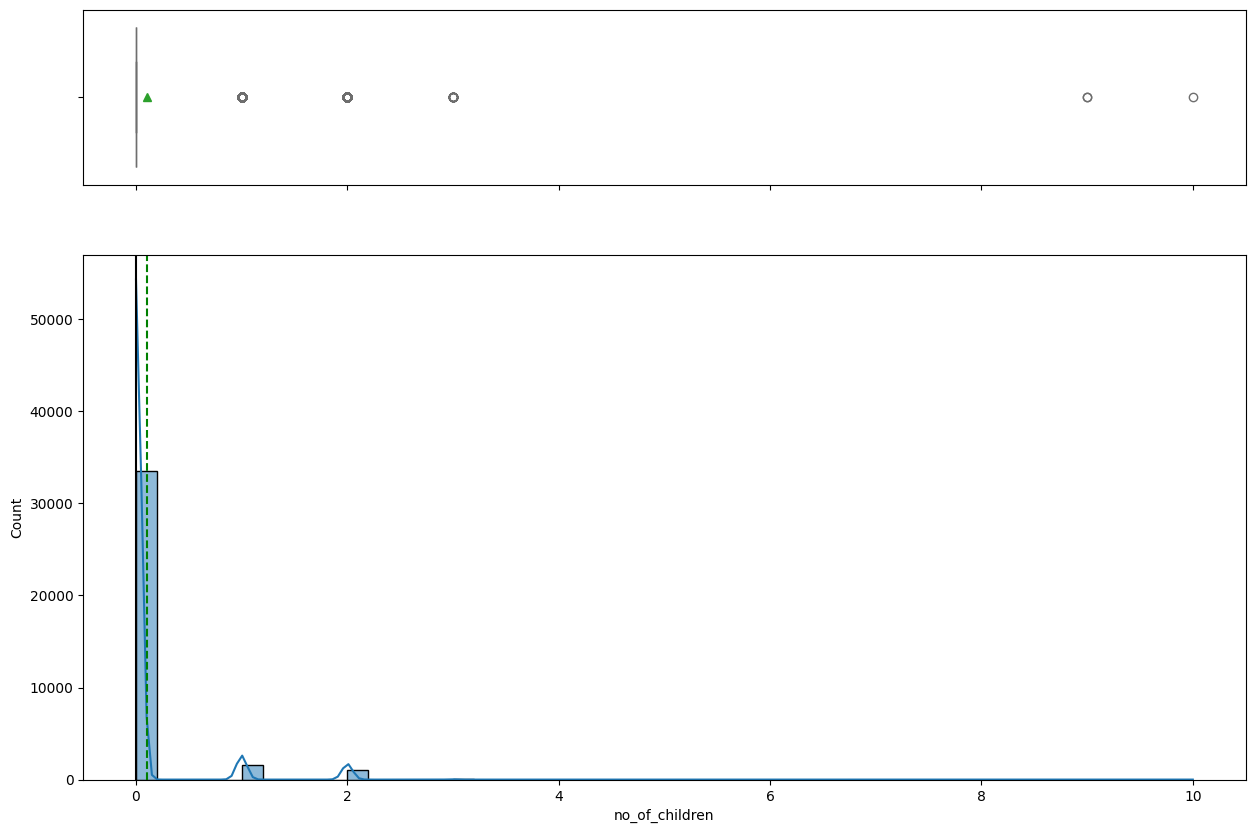

In [125]:
histogram_boxplot(df, "no_of_children", bins=50)

* Most of the booking were made with zero no of child. But also seems to have outliers present in it.
* We need to check if there is any relation with multiple number of children.

In [126]:
df[df['no_of_children']>=4]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled
10041,INN10042,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,INN10062,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50,1,Canceled


- One or two adults with 9 to 10 children is a rare phenomenon.
- We must get more understanding on this from client.

#### Observation on no of weekend nights

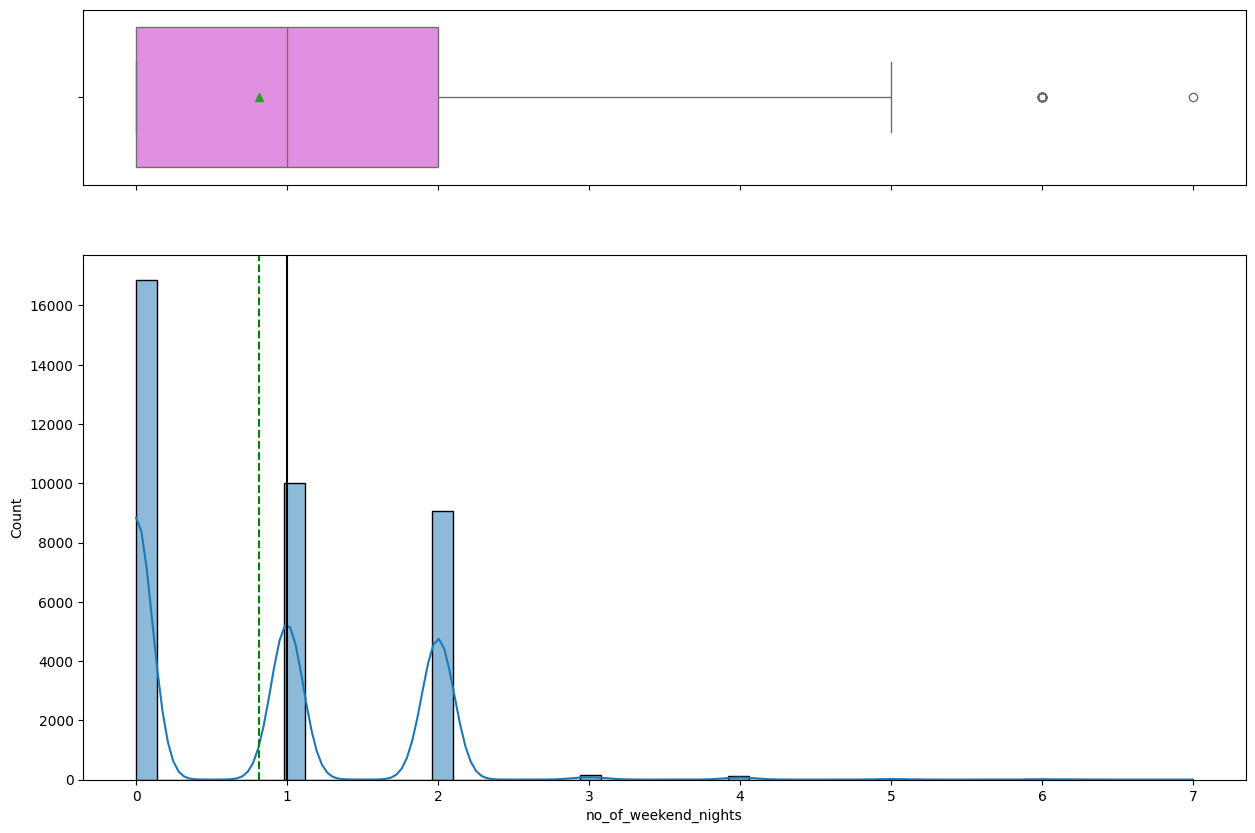

In [127]:
histogram_boxplot(df, "no_of_weekend_nights", bins=50)

- It is right skewe. As booking more than 2 weekend nights means long stay in the hotel.
- We shall check in depth to understand these bookings.

In [128]:
stays_more_than_week=df[df['no_of_weekend_nights']> 2]
stays_more_than_week

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
194,INN00195,2,0,4,10,Meal Plan 1,0,Room_Type 4,147,2018,8,3,Online,0,0,0,118.88,1,Canceled
380,INN00381,2,0,4,11,Meal Plan 1,0,Room_Type 4,237,2018,9,13,Online,0,0,0,116.62,1,Canceled
448,INN00449,2,0,3,5,Meal Plan 1,0,Room_Type 4,5,2018,4,4,Online,0,0,0,126.75,0,Canceled
477,INN00478,2,0,3,7,Not Selected,0,Room_Type 1,217,2018,12,5,Online,0,0,0,46.63,1,Not_Canceled
539,INN00540,1,0,6,15,Meal Plan 1,0,Room_Type 4,12,2018,3,30,Online,0,0,0,128.06,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35737,INN35738,2,0,3,7,Meal Plan 1,0,Room_Type 1,259,2018,8,22,Online,0,0,0,65.49,0,Canceled
35778,INN35779,3,0,4,10,Meal Plan 1,0,Room_Type 4,73,2018,7,2,Online,0,0,0,145.93,0,Canceled
35784,INN35785,2,0,4,8,Meal Plan 1,0,Room_Type 4,5,2018,2,12,Online,0,0,0,106.83,0,Canceled
35904,INN35905,2,2,4,10,Meal Plan 1,0,Room_Type 6,43,2018,3,25,Online,0,0,0,170.61,0,Canceled


In [129]:
# check the ratio of cancellation for stays more than a week
stays_more_than_week['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Canceled,0.602374
Not_Canceled,0.397626


- We can clearly observe that booking with more than 7 days has more probability (~ 60%) of getting cancelled.
- We will try to analyze further if we can understand of getting cancelled for these bookings.

In [130]:
stays_more_than_week[stays_more_than_week['booking_status']=='Canceled'].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,203.0,1.714286,0.627065,0.0,1.000,2.00,2.00,3.0
no_of_children,203.0,0.216749,0.582174,0.0,0.000,0.00,0.00,2.0
no_of_weekend_nights,203.0,3.950739,0.932120,3.0,3.000,4.00,4.00,7.0
no_of_week_nights,203.0,8.669951,2.944105,5.0,6.000,9.00,10.00,17.0
required_car_parking_space,203.0,0.014778,0.120963,0.0,0.000,0.00,0.00,1.0
lead_time,203.0,99.729064,90.204446,1.0,17.000,78.00,162.00,346.0
arrival_year,203.0,2017.896552,0.305296,2017.0,2018.000,2018.00,2018.00,2018.0
arrival_month,203.0,7.418719,2.920912,2.0,5.000,8.00,9.50,12.0
arrival_date,203.0,14.487685,9.001848,1.0,7.000,13.00,22.00,31.0
repeated_guest,203.0,0.000000,0.000000,0.0,0.000,0.00,0.00,0.0


In [131]:
stays_more_than_week[stays_more_than_week['booking_status']=='Not_Canceled'].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,134.0,1.850746,0.581772,1.0,1.2500,2.00,2.0000,3.00
no_of_children,134.0,0.126866,0.414432,0.0,0.0000,0.00,0.0000,2.00
no_of_weekend_nights,134.0,3.507463,0.712364,3.0,3.0000,3.00,4.0000,6.00
no_of_week_nights,134.0,7.097015,2.396330,5.0,5.0000,6.50,8.0000,17.00
required_car_parking_space,134.0,0.022388,0.148497,0.0,0.0000,0.00,0.0000,1.00
lead_time,134.0,79.201493,77.057910,0.0,10.0000,53.00,124.5000,351.00
arrival_year,134.0,2017.835821,0.371828,2017.0,2018.0000,2018.00,2018.0000,2018.00
arrival_month,134.0,7.276119,3.392588,1.0,5.0000,8.00,9.0000,12.00
arrival_date,134.0,16.597015,8.942691,1.0,9.2500,18.00,23.0000,31.00
repeated_guest,134.0,0.022388,0.148497,0.0,0.0000,0.00,0.0000,1.00


- Probability of getting cancelled for more than a week bookings might be dependent on the price of the rooms.
- Mean observed price of room for cancelled and not cancelled bookings are 108 euros and 97 euros respectively. A little higher mean price could be observed for bookings which got cancelled with the not cancelled bookings.

In [132]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

#### Observations on no of week nights

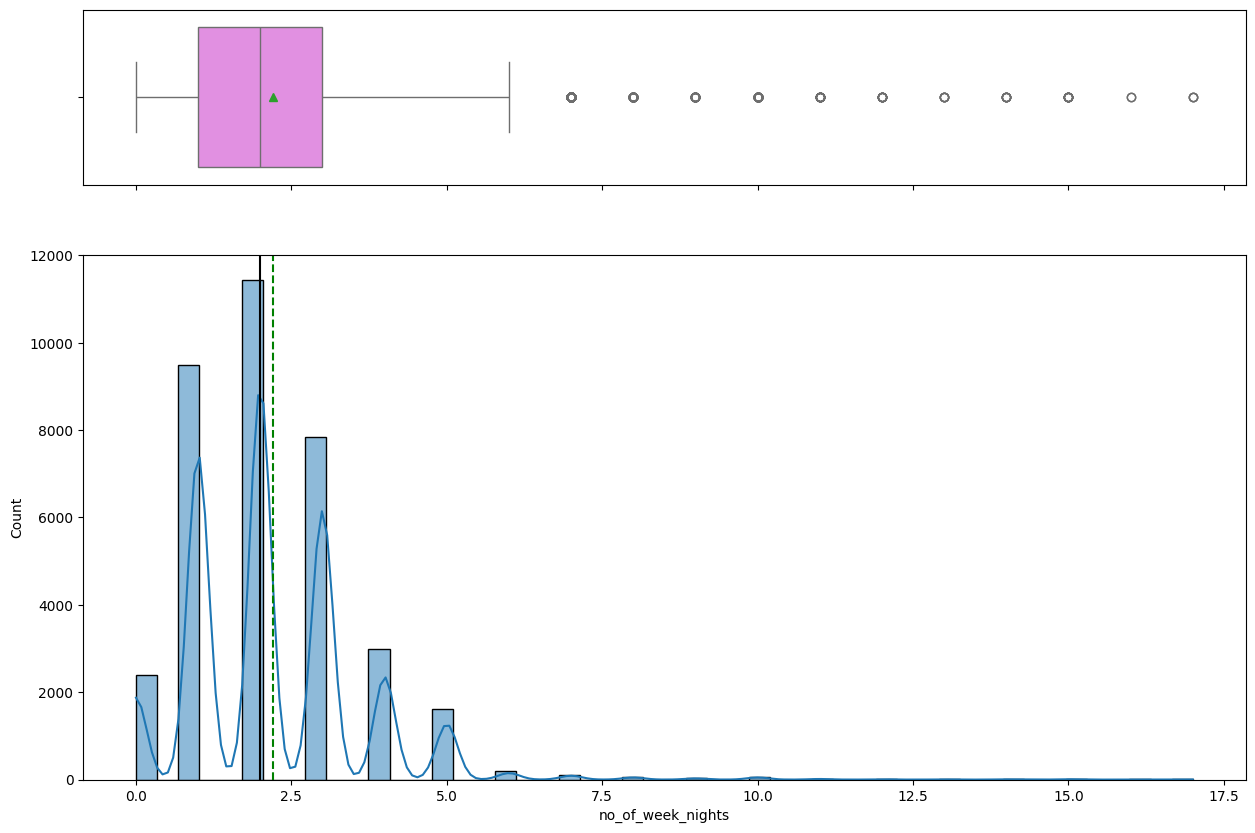

In [133]:
histogram_boxplot(df, "no_of_week_nights", bins=50)

- Seems to have outliers for the no of week day nights more than ~5.5 days.
- We can also check those outliers.

In [134]:
stays_more_than_5_5_days=df[df['no_of_week_nights'] > 5.5]
stays_more_than_5_5_days

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
194,INN00195,2,0,4,10,Meal Plan 1,0,Room_Type 4,147,2018,8,3,Online,0,0,0,118.88,1,Canceled
235,INN00236,2,0,2,6,Not Selected,0,Room_Type 1,4,2017,8,14,Online,0,0,0,95.13,1,Not_Canceled
299,INN00300,2,0,2,6,Meal Plan 1,0,Room_Type 1,2,2018,11,16,Online,0,0,0,92.54,2,Not_Canceled
352,INN00353,1,0,2,6,Meal Plan 1,0,Room_Type 1,11,2018,7,5,Online,0,0,0,145.00,0,Canceled
374,INN00375,2,0,2,6,Meal Plan 1,0,Room_Type 1,36,2018,12,10,Online,0,0,0,68.07,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36130,INN36131,2,0,2,7,Meal Plan 1,0,Room_Type 1,117,2018,12,20,Online,0,0,0,90.40,1,Not_Canceled
36163,INN36164,1,0,6,13,Meal Plan 1,0,Room_Type 4,102,2018,5,15,Online,0,0,0,132.60,1,Canceled
36207,INN36208,1,0,2,7,Meal Plan 1,0,Room_Type 1,71,2018,6,10,Online,0,0,0,133.50,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled


In [135]:
stays_more_than_5_5_days['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Canceled,0.561404
Not_Canceled,0.438596


In [136]:
stays_more_than_5_5_days[stays_more_than_5_5_days['booking_status']=='Canceled'].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,288.0,1.753472,0.617674,0.0,1.000,2.00,2.000,3.00
no_of_children,288.0,0.204861,0.556599,0.0,0.000,0.00,0.000,2.00
no_of_weekend_nights,288.0,3.239583,1.255606,2.0,2.000,3.00,4.000,7.00
no_of_week_nights,288.0,8.375000,2.494244,6.0,6.000,8.00,10.000,17.00
required_car_parking_space,288.0,0.010417,0.101706,0.0,0.000,0.00,0.000,1.00
lead_time,288.0,103.784722,84.892649,1.0,27.000,88.50,166.250,346.00
arrival_year,288.0,2017.902778,0.296776,2017.0,2018.000,2018.00,2018.000,2018.00
arrival_month,288.0,7.270833,2.907922,2.0,5.000,7.00,9.000,12.00
arrival_date,288.0,14.190972,9.080073,1.0,6.750,13.00,22.000,31.00
repeated_guest,288.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.00


In [137]:
stays_more_than_5_5_days[stays_more_than_5_5_days['booking_status']=='Not_Canceled'].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,225.0,1.902222,0.471741,1.0,2.00,2.00,2.0,3.00
no_of_children,225.0,0.115556,0.395260,0.0,0.00,0.00,0.0,2.00
no_of_weekend_nights,225.0,2.684444,0.941588,2.0,2.00,2.00,3.0,6.00
no_of_week_nights,225.0,7.226667,1.799603,6.0,6.00,7.00,8.0,17.00
required_car_parking_space,225.0,0.004444,0.066667,0.0,0.00,0.00,0.0,1.00
lead_time,225.0,84.564444,78.470403,0.0,17.00,64.00,127.0,351.00
arrival_year,225.0,2017.795556,0.404194,2017.0,2018.00,2018.00,2018.0,2018.00
arrival_month,225.0,7.702222,3.415464,1.0,6.00,8.00,11.0,12.00
arrival_date,225.0,15.097778,9.205455,1.0,8.00,15.00,23.0,31.00
repeated_guest,225.0,0.017778,0.132437,0.0,0.00,0.00,0.0,1.00


- We can also observe here booking with more than 5.5 week nights has ~10% higher probability of getting cancelled.
- Price of rooms are likely to be the main reason for cancellation.

#### Observations on lead_time

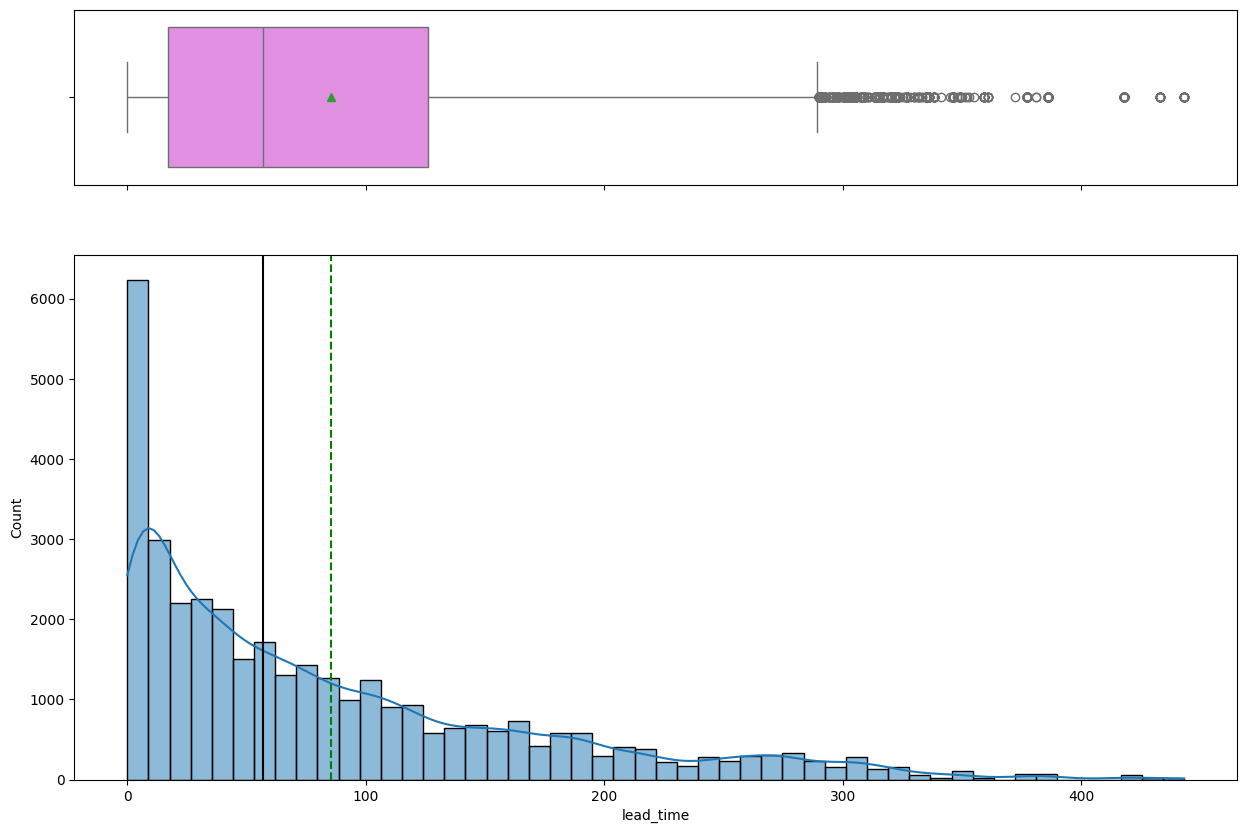

In [138]:
histogram_boxplot(df, "lead_time", bins=50)

- Lead time seems to be right skewed. It also have some outliers towards the right tail.

In [139]:
# let's check why the outliers in Lead time
lead_time_outliers=df[df['lead_time'] > 290]
lead_time_outliers

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.0,1,Canceled
96,INN00097,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,8,18,Online,0,0,0,115.0,1,Canceled
118,INN00119,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.0,0,Canceled
120,INN00121,2,0,0,3,Meal Plan 1,0,Room_Type 1,317,2018,9,1,Online,0,0,0,106.2,1,Canceled
170,INN00171,2,0,0,2,Meal Plan 1,0,Room_Type 1,317,2018,9,15,Online,0,0,0,120.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36139,INN36140,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,2018,11,4,Offline,0,0,0,89.0,0,Canceled
36171,INN36172,2,0,1,2,Meal Plan 2,0,Room_Type 1,315,2018,9,30,Offline,0,0,0,160.0,0,Canceled
36178,INN36179,2,0,2,0,Meal Plan 2,0,Room_Type 1,386,2018,10,23,Offline,0,0,0,115.0,1,Canceled
36191,INN36192,2,0,0,3,Meal Plan 1,0,Room_Type 1,304,2018,11,3,Offline,0,0,0,89.0,0,Canceled


In [140]:
# Let's check the cancellation percentile for these booking
lead_time_outliers['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Canceled,0.804651
Not_Canceled,0.195349


- It is very clear that if the booking date is very far / prior bookings are likely to get cancelled.

#### Observation on arival month

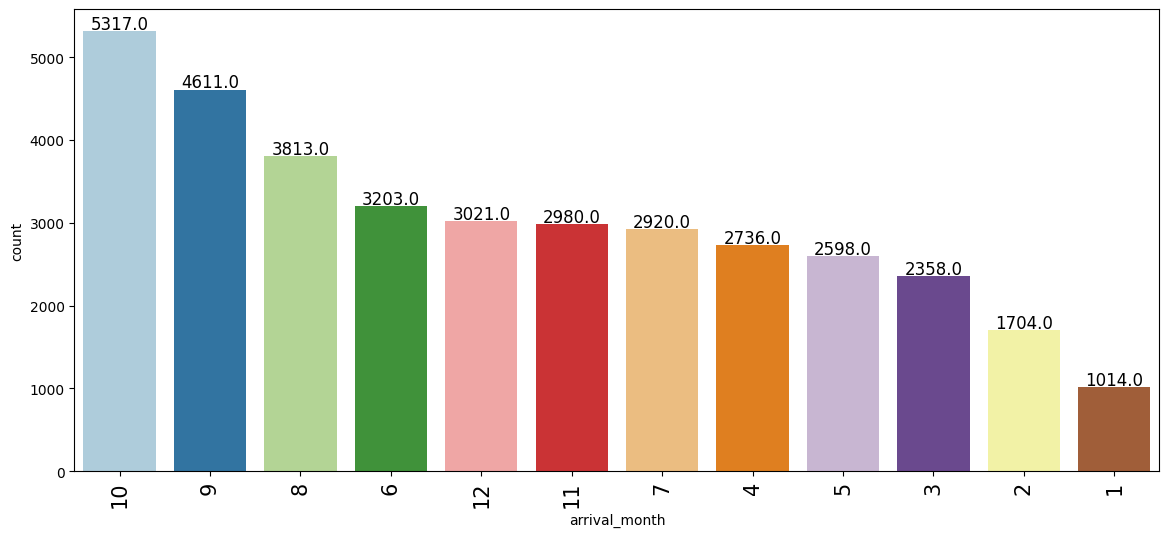

In [141]:
labeled_barplot(df, "arrival_month")

- October has the highest number of arrivals, followed by September and August. January and February have the lowest number of arrivals.

#### Observations on avg Price per room

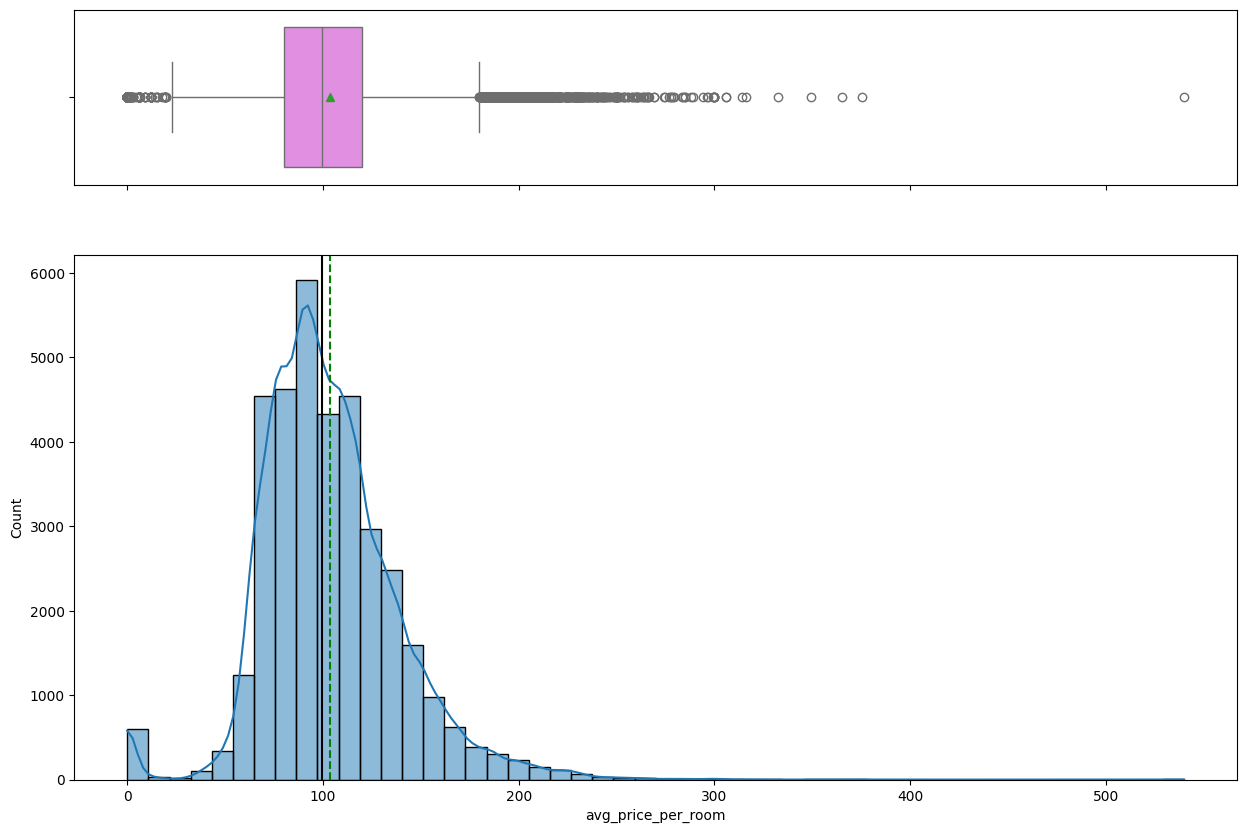

In [142]:
histogram_boxplot(df, "avg_price_per_room",bins=50)

- Distribution looks normal and slightly right skewed with outliers.
- Mean and median are almost existing at same point ~ 100-105 Euros.

In [143]:
# Let's check the outliers
AVG_Price_outliers=df[df['avg_price_per_room'] > 200]
AVG_Price_outliers

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
60,INN00061,2,2,0,1,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0,0,258.00,1,Not_Canceled
162,INN00163,3,0,2,2,Meal Plan 1,0,Room_Type 7,3,2018,10,7,Online,0,0,0,215.60,1,Not_Canceled
227,INN00228,1,2,2,2,Meal Plan 1,0,Room_Type 6,4,2017,9,19,Online,0,0,0,200.75,2,Not_Canceled
311,INN00312,2,2,0,2,Meal Plan 1,0,Room_Type 6,22,2018,9,16,Online,0,0,0,239.00,2,Not_Canceled
388,INN00389,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,5,14,Online,0,0,0,221.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,INN36134,3,0,0,1,Meal Plan 1,0,Room_Type 4,0,2018,8,23,Online,0,0,0,225.00,2,Not_Canceled
36172,INN36173,1,0,0,2,Meal Plan 1,0,Room_Type 4,1,2018,9,27,Online,0,0,0,205.00,1,Not_Canceled
36221,INN36222,2,2,2,4,Meal Plan 1,0,Room_Type 6,62,2018,9,24,Online,0,0,0,207.90,1,Not_Canceled
36227,INN36228,2,2,0,1,Meal Plan 1,0,Room_Type 6,20,2018,8,6,Online,0,0,0,231.00,1,Not_Canceled


In [144]:
AVG_Price_outliers['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.510081
Canceled,0.489919


- Outliers seems to have no influence on booking cancellation.

#### Observation on market segment

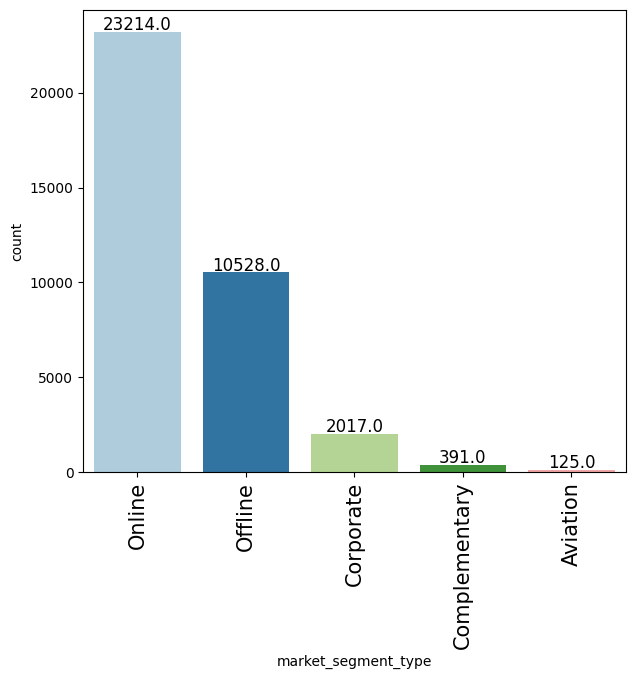

In [145]:
labeled_barplot(df,'market_segment_type')

In [146]:
df['market_segment_type'].value_counts(normalize = True)

,proportion
market_segment_type,
Online,0.639945
Offline,0.290227
Corporate,0.055603
Complementary,0.010779
Aviation,0.003446


- The online mode is the most dominant market segment (~64%), followed by the offline mode (29%).
- Bookings in the complimentary and aviation market segments are very few.

#### Observations on room type reserved

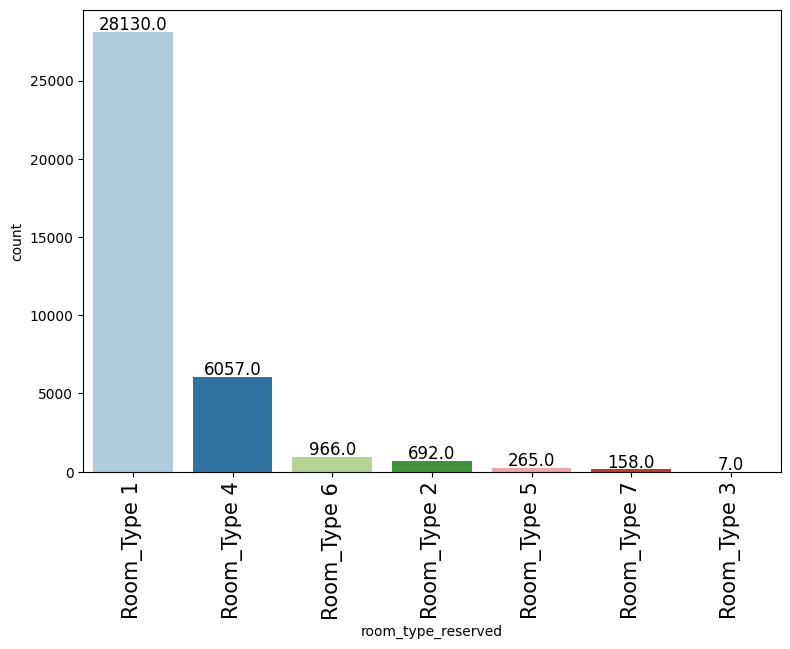

In [147]:
labeled_barplot(df,'room_type_reserved')

In [148]:
df['room_type_reserved'].value_counts(normalize = True)

,proportion
room_type_reserved,
Room_Type 1,0.775465
Room_Type 4,0.166975
Room_Type 6,0.026630
Room_Type 2,0.019076
Room_Type 5,0.007305
Room_Type 7,0.004356
Room_Type 3,0.000193


- Type one rooms were booked the most (77%), followed by type four rooms (~17%). Other types of rooms had significantly fewer bookings.

#### Observation on booking status


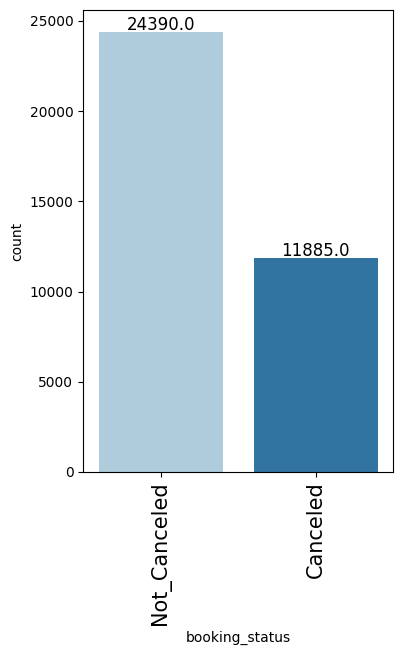

In [149]:
labeled_barplot(df,'booking_status')

In [150]:
df['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.672364
Canceled,0.327636


- Almost one third of the total bookings got cancelled.

### Bivariate Analysis

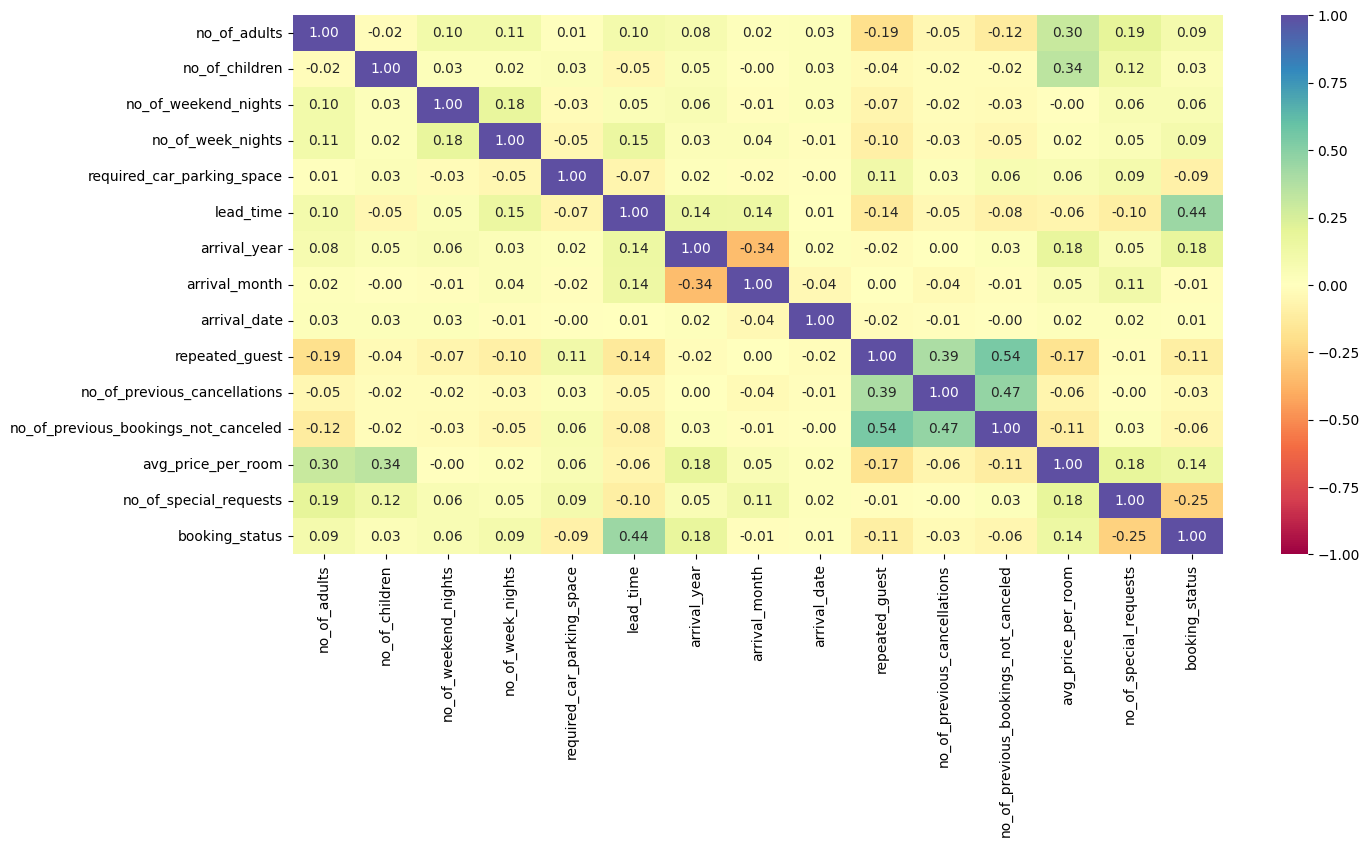

In [151]:
df1=data.copy()
df1["booking_status"] = df1["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


- Booking Status cancelled has got a good positive correlation with the Lead Time. And also it is negatively correlated with the special requests and repeated guests.
- No of previous bookings not cancelled has got positive correlation with repeated guests.
- Relation can be also observed with respect to previous bookings not cancelled and previous cancellation.

In [152]:
sns.pairplot(df, hue="booking_status")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Bivariate market segment vs price

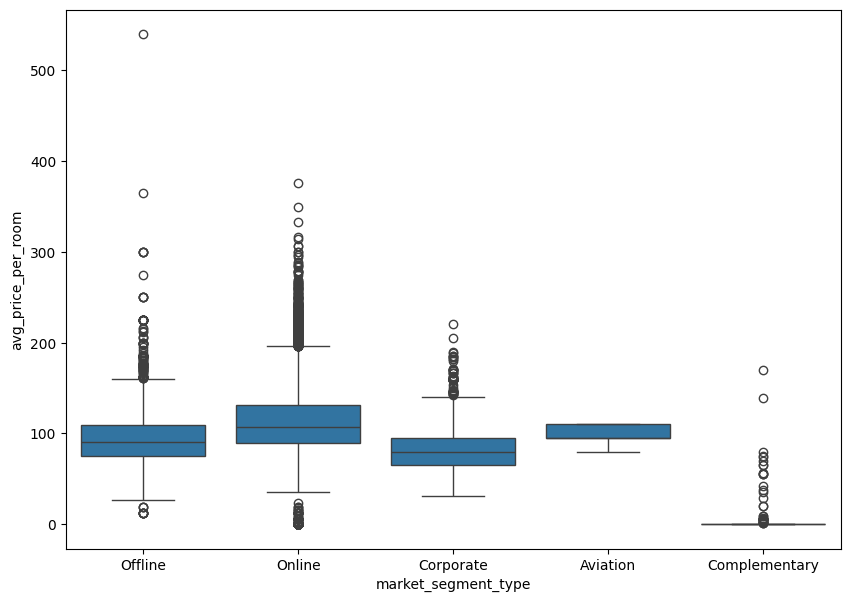

In [153]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room');

- Outliers can be observed in all the market segments.

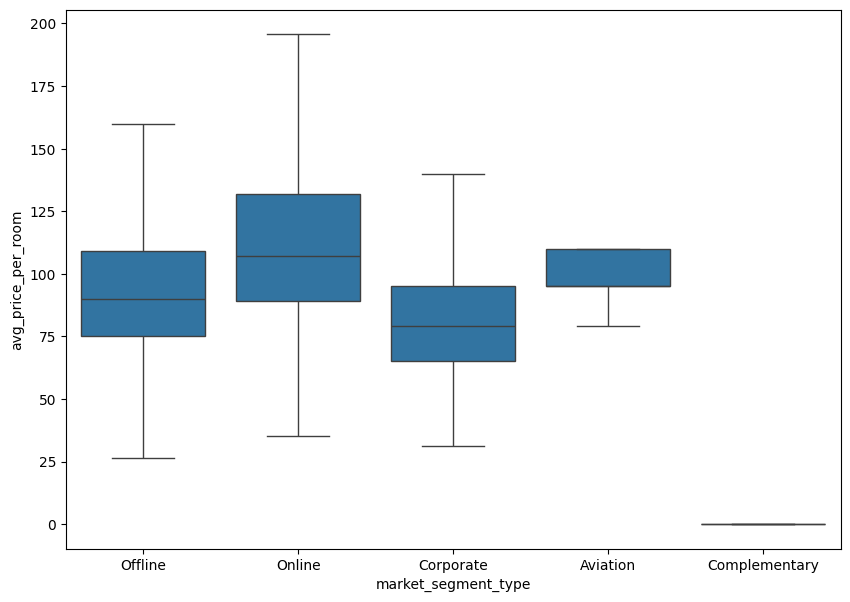

In [154]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room',showfliers =False);

- The mean price per room for Online market segments are at the highest level.
- Further analysis will be needed to check if the cancellation probability is more or not.

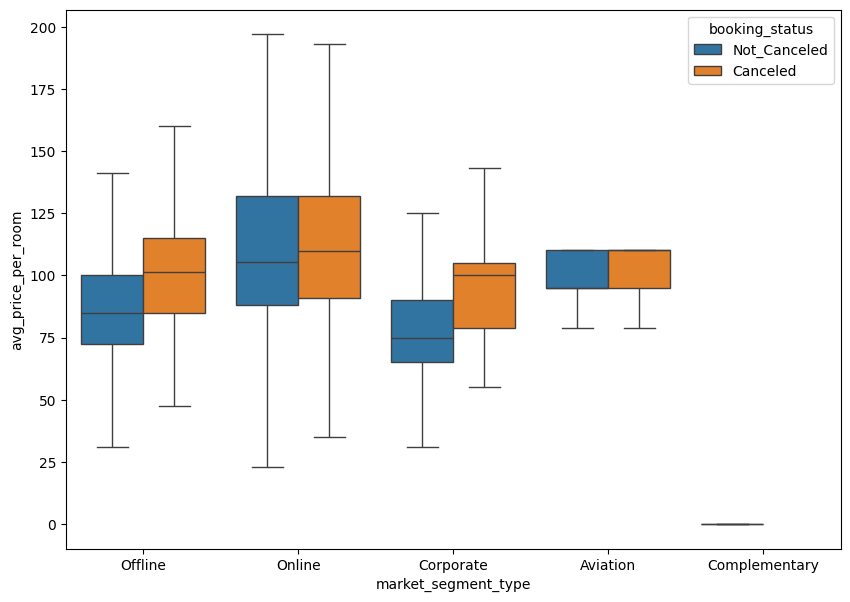

In [155]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='market_segment_type',y='avg_price_per_room',hue='booking_status',showfliers =False);

- For corporate and offline bookings, the mean price per room for cancelled bookings was significantly higher compared to non-cancelled bookings.
- In contrast, online and aviation bookings exhibited nearly identical room prices regardless of whether the bookings were cancelled or not.

In [156]:
Online_market_segment=df[df['market_segment_type']=='Online']
Online_market_segment['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.634919
Canceled,0.365081


In [157]:
Offline_market_segment=df[df['market_segment_type']=='Offline']
Offline_market_segment['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.700513
Canceled,0.299487


In [158]:
Corporate_market_segment=df[df['market_segment_type']=='Corporate']
Corporate_market_segment['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.890927
Canceled,0.109073


In [159]:
Aviation_market_segment=df[df['market_segment_type']=='Aviation']
Aviation_market_segment['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.704
Canceled,0.296


In [160]:
Complementary_market_segment=df[df['market_segment_type']=='Complementary']
Complementary_market_segment['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,1.0


- Online bookings have a higher probability of cancellation at 36.5%, compared to offline and aviation bookings, which have a cancellation probability of around 30%.

#### Bivariate on repeating guest

In [161]:
repeadted_guest_list=df[df['repeated_guest']==1]
repeadted_guest_list['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.982796
Canceled,0.017204


booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


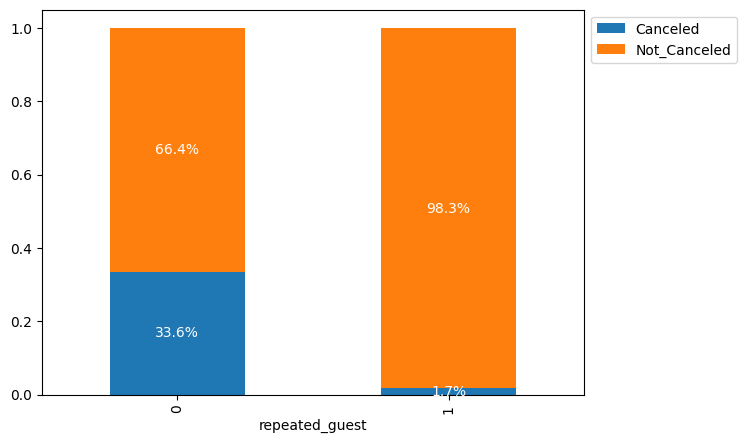

In [162]:
stacked_barplot(df,'repeated_guest','booking_status')

- Repeat guests are less likely to cancel (1.7%) their bookings compared to new guests.
- We can also check what are the no of previous booking not cancelled and how many of them are fall in the repeated guests.

In [163]:
previous_bookings_not_canceled=df[df['no_of_previous_bookings_not_canceled']>0]
previous_bookings_not_canceled['repeated_guest'].value_counts()

,count
repeated_guest,
1,812


In [164]:
previous_bookings_not_canceled[previous_bookings_not_canceled['booking_status']=='Cancelled']

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


- The guests who did not cancelled their bookings previously, seems to be the repeated guests who did not calcelled new bookings as well.

#### Observation on special requests

In [165]:
special_req_list=df[df['no_of_special_requests']>0]
special_req_list['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.797551
Canceled,0.202449


In [166]:
special_req_list['no_of_previous_cancellations'].value_counts()

,count
no_of_previous_cancellations,
0,16384
1,45
2,21
11,17
3,15
5,8
4,7
6,1


In [167]:
special_req_list[special_req_list['no_of_previous_cancellations']>1].shape[0]

69

- Guests who make special requests are less likely to cancel their bookings. Historically, only 69 guests with special requests have cancelled their bookings. Currently, the cancellation rate for bookings with special requests is just 20%.

#### Bivariate on lead time

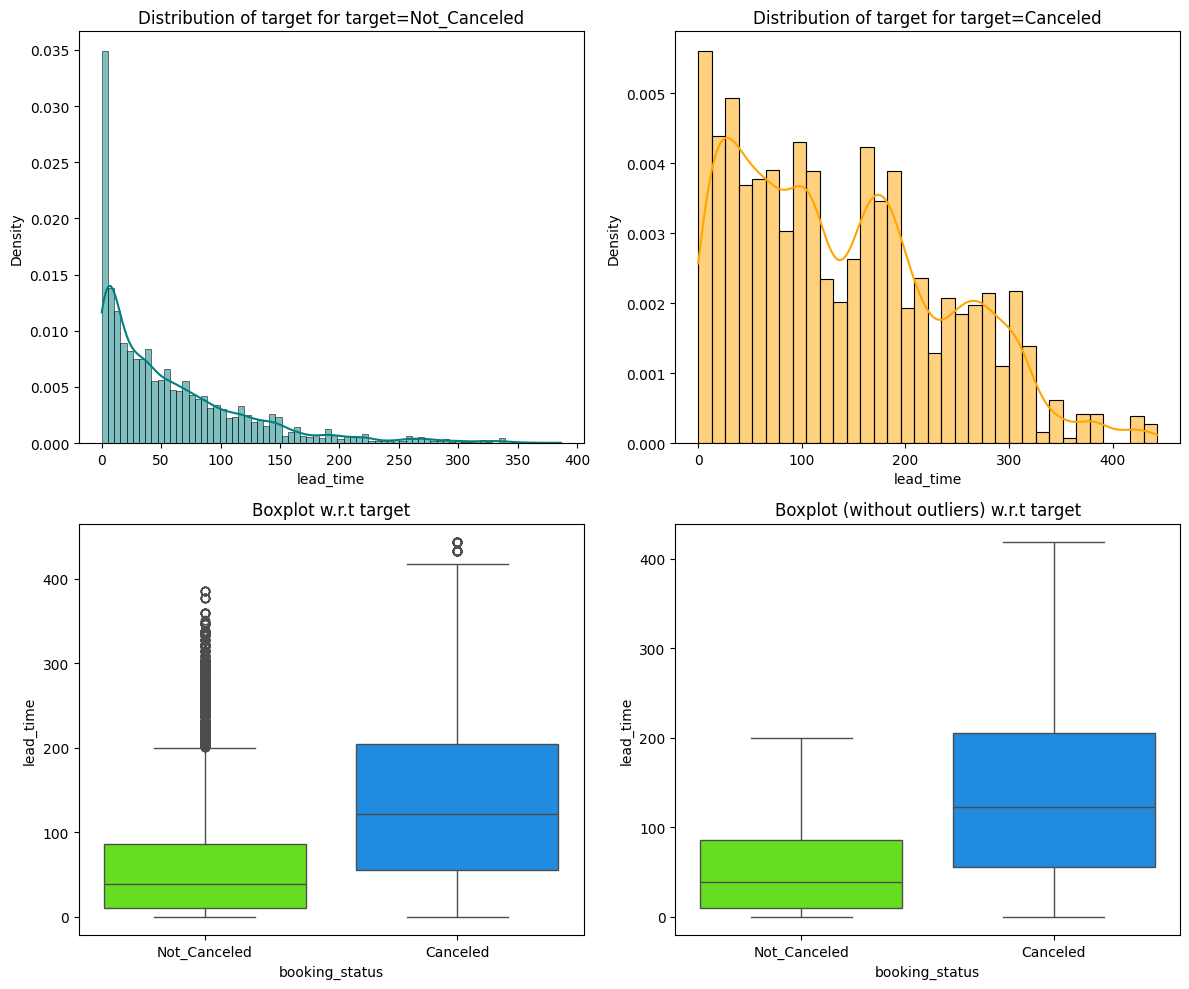

In [294]:
distribution_plot_wrt_target(df,'lead_time','booking_status')

- As the lead time increases probability of booking getting canceled increases.

#### Observation on avg room price w.r.t. booking status

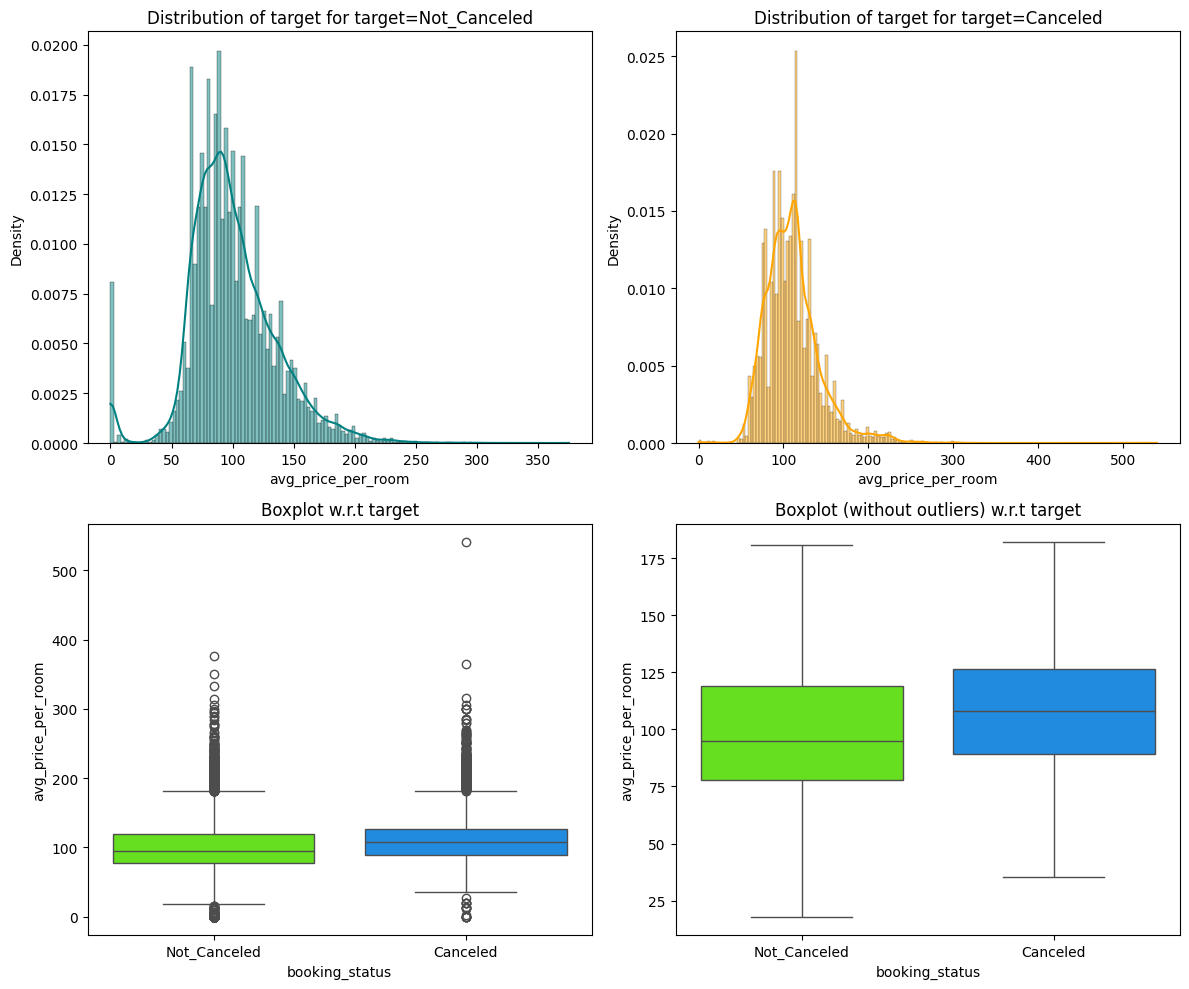

In [295]:
distribution_plot_wrt_target(df,'avg_price_per_room','booking_status')

- The mean price per room is slightly higher for the booking getting canceled than the not canceled.

 # Logistic Regression

### Data Preprocessing

- We labeled no_of_booking_not_cancelled in four different groups
    * Very Low (count< 1)
    * Low (Count 1 to 5)
    * Medium (count 6 to 15)
    * High (count 15 to 30)
- Also we have labelled no_of_previous_cancellations in three different groups    
    * No Cancellations (Count = 0)
    * Few Cancellations (Count = 1 to 5)
    * Moderate Cancellations (Count = 6 to 10)
- We can drop 'no_of_children', 'required_car_parking_space', 'no_of_previous_cancellations', and 'no_of_previous_bookings_not_canceled' as most of the observations are 0 in these variables.
- 'Booking_ID' we can drop as it is a unique value no influence can be observed.
- There are many outliers in the data which we will treat (perform capping of outliers)
  - All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.


In [168]:
# Define labeling function
def label_bookings(count):
    if count < 1:
        return 'Very Low'
    elif count <= 5:
        return 'Low'
    elif count <= 15:
        return 'Medium'
    elif count <= 30:
        return 'High'
    else:
        return 'Very High'

# Apply the labeling function to the dataframe
df['booking_label'] = df['no_of_previous_bookings_not_canceled'].apply(label_bookings)

In [169]:
# Define the function to label the data
def label_cancellations(row):
    if row['no_of_previous_cancellations'] == 0:
        return 'No Cancellations'
    elif row['no_of_previous_cancellations'] <= 5:
        return 'Few Cancellations'
    elif row['no_of_previous_cancellations'] <= 10:
        return 'Moderate Cancellations'
    else:
        return 'Frequent Cancellations'

# Apply the labeling function
df['cancellation_label'] = df.apply(label_cancellations, axis=1)

In [170]:
df['repeated_guest'] = df['repeated_guest'].map({0: 'No', 1: 'Yes'})

In [171]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_label,cancellation_label
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00,0,Not_Canceled,Very Low,No Cancellations
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68,1,Not_Canceled,Very Low,No Cancellations
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00,0,Canceled,Very Low,No Cancellations
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00,0,Canceled,Very Low,No Cancellations
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50,0,Canceled,Very Low,No Cancellations
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,No,0,0,115.00,1,Canceled,Very Low,No Cancellations
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,No,0,0,107.55,1,Not_Canceled,Very Low,No Cancellations
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,No,0,0,105.61,1,Not_Canceled,Very Low,No Cancellations
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,No,0,0,96.90,1,Not_Canceled,Very Low,No Cancellations
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,No,0,0,133.44,3,Not_Canceled,Very Low,No Cancellations


In [172]:
df.drop(['no_of_children', 'Booking_ID', 'required_car_parking_space','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1, inplace=True)

In [173]:
df["arrival_year"].value_counts()

,count
arrival_year,
2018,29761
2017,6514


#### Outlier Detection

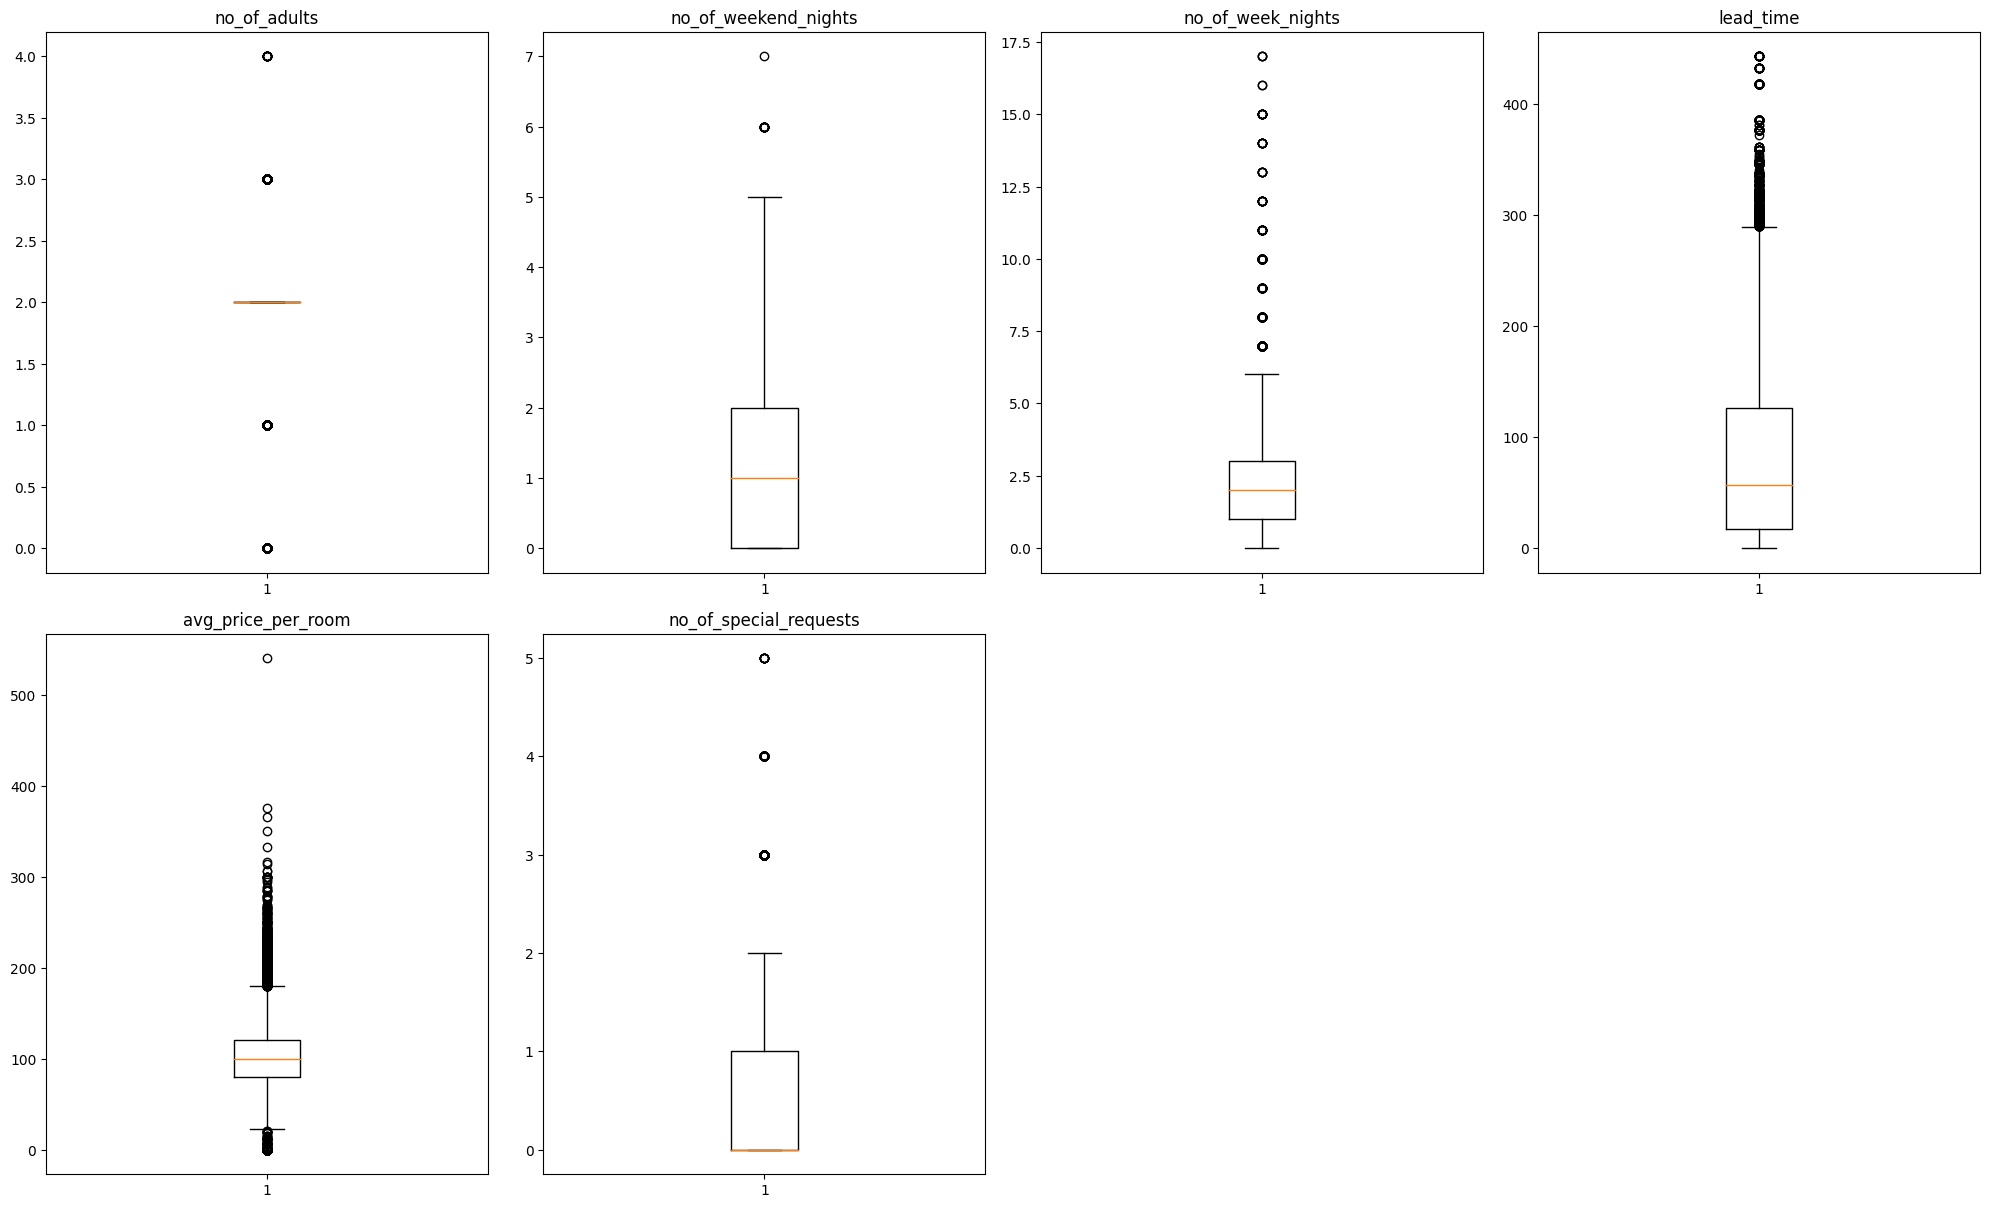

In [174]:
# Selecting numerical columns
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

# Filter out specific columns
filtered_numerical_col = [col for col in numerical_col if col not in ['arrival_year', 'arrival_month', 'arrival_date']]

# Plotting box plots to check outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(filtered_numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

- No of week / weekend nights, no of special request, and lead time has upper outliers.
- Average price per room has outliers at both the tails.

In [175]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [176]:
# Selecting numerical columns
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

# Assuming treat_outliers_all is a function that processes outliers
df = treat_outliers_all(df, filtered_numerical_col)

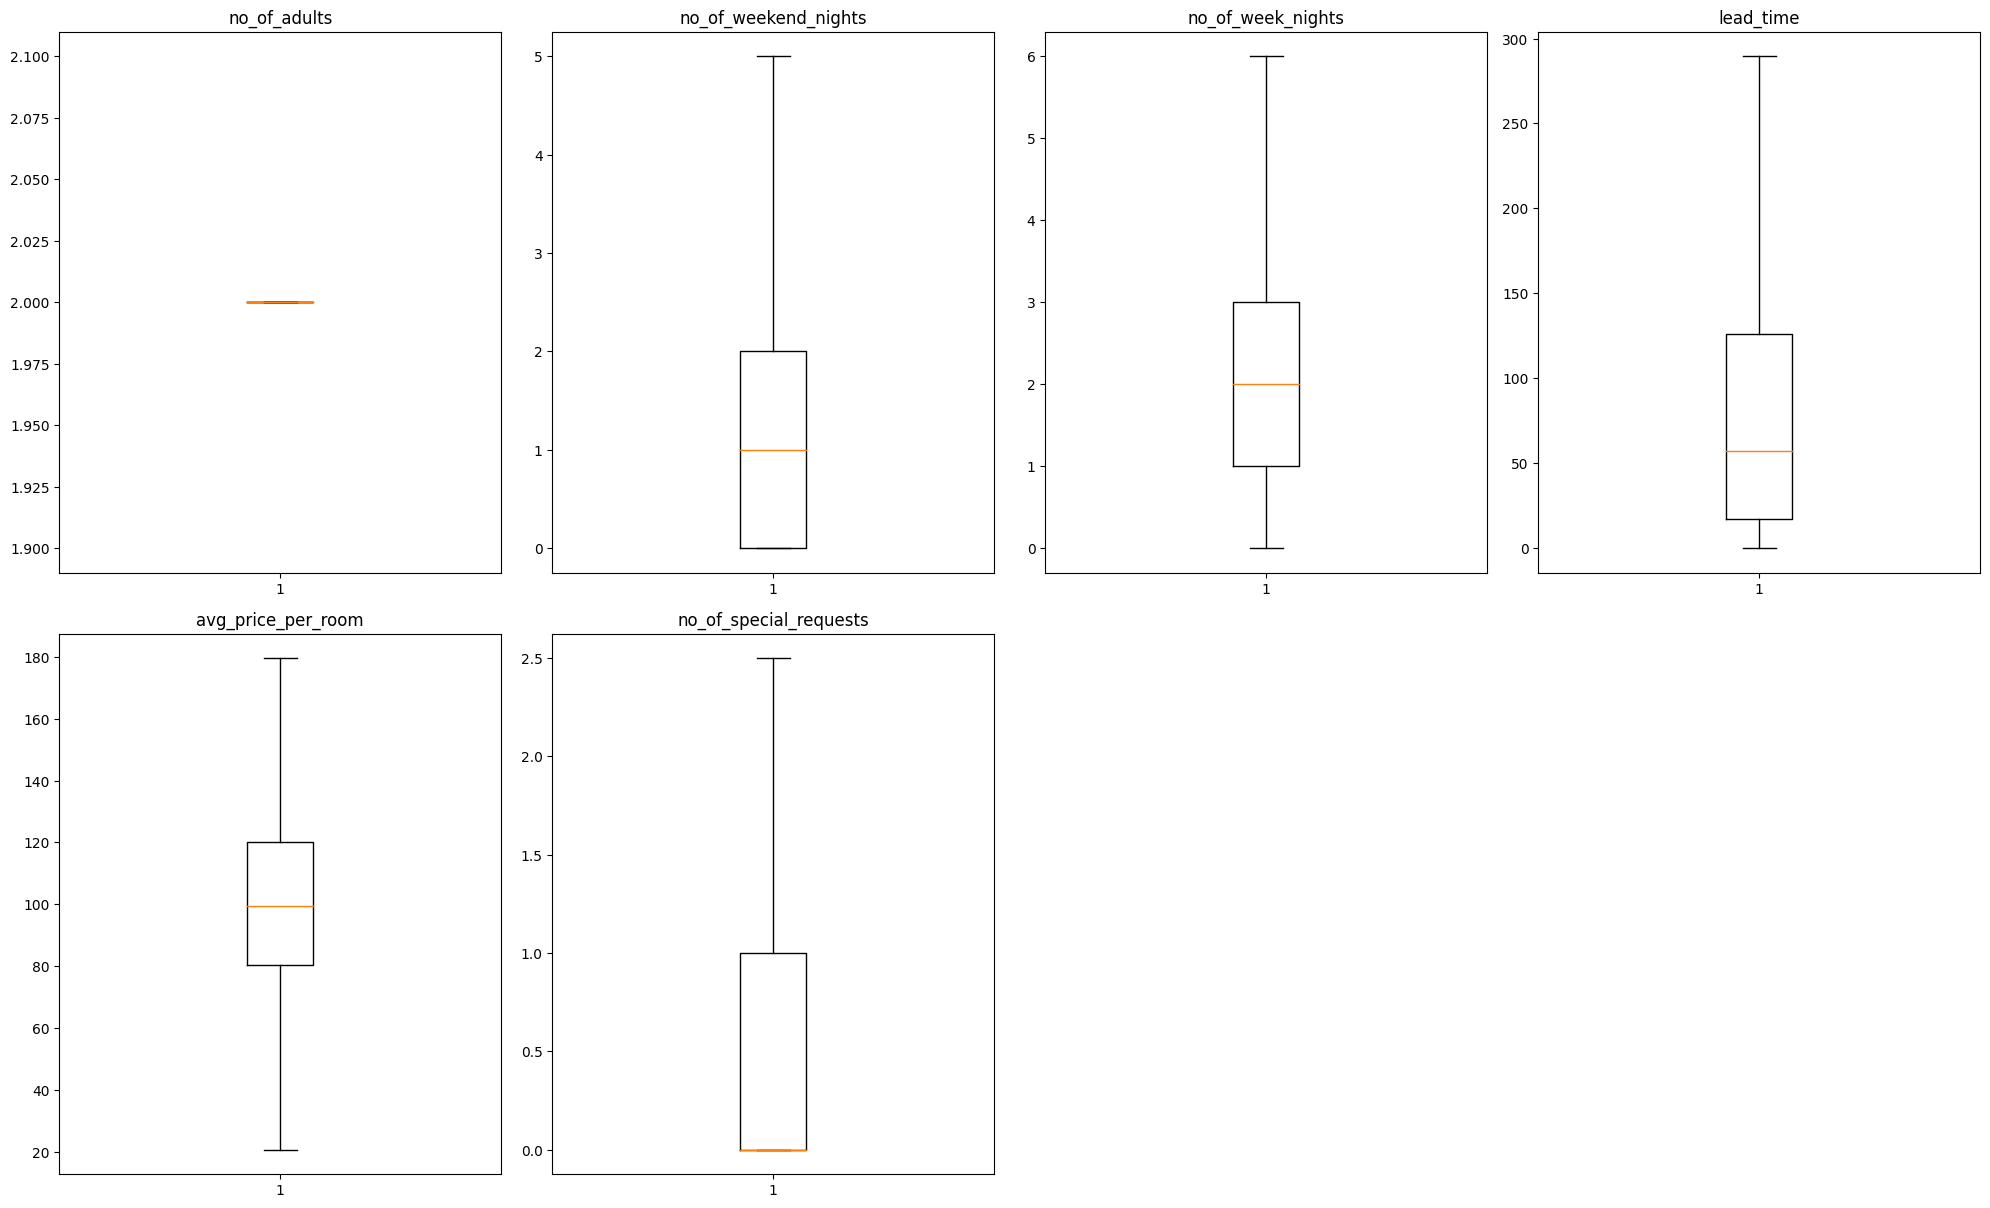

In [177]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))
filtered_numerical_col = [col for col in numerical_col if col not in ['arrival_year','arrival_month','arrival_date']]
for i, variable in enumerate(filtered_numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We should not remove the outliers which are present in the date/age column. Hence, we did not remove outliers from arrival year, arrival month, arrival date columns.

In [178]:
df["arrival_year"].value_counts()

,count
arrival_year,
2018,29761
2017,6514


- Tried to understand if the code was successful in not treating outliers for arrival_year.

### Data Preparation for Modeling

**Encoding Not Cancelled as 0 and Cancelled as 1 as the INN hotel authority wants the reason behind booking cancellation.**

In [179]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**Creating training and test set**

In [180]:
# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [181]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


In [182]:
X_train

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_label_Low,booking_label_Medium,booking_label_Very High,booking_label_Very Low,cancellation_label_Frequent Cancellations,cancellation_label_Moderate Cancellations,cancellation_label_No Cancellations
13662,2.0,0.0,1.0,163.0,2018.0,10.0,15.0,115.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26641,2.0,0.0,3.0,113.0,2018.0,3.0,31.0,78.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17835,2.0,2.0,3.0,289.5,2018.0,10.0,14.0,78.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21485,2.0,0.0,3.0,136.0,2018.0,6.0,29.0,85.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5670,2.0,1.0,2.0,21.0,2018.0,8.0,15.0,151.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,2.0,2.0,1.0,66.0,2018.0,11.0,12.0,105.33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32511,2.0,0.0,2.0,70.0,2018.0,4.0,22.0,105.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5192,2.0,1.0,2.0,24.0,2018.0,6.0,6.0,120.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12172,2.0,1.0,1.0,3.0,2018.0,3.0,21.0,179.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [183]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False,method='bfgs')

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25362
Method:                           MLE   Df Model:                           29
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.3180
Time:                        14:26:53   Log-Likelihood:                -10974.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
no_of_adults                                 -0.0019     57.611  -3.23e-05      1.000    -112.917     112.913
no_of_weekend_nights                  

**Observations**

- Negative values of the coefficient show that the probability of a booking to get canceled decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a booking to get canceled increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a booking status as cancelled but in reality the booking status is not cancelled.
2. Predicting a booking status as not cancelled but in reality the booking status is cancelled.

**Which case is more important?**

* Both the cases are important.

**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [184]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [185]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

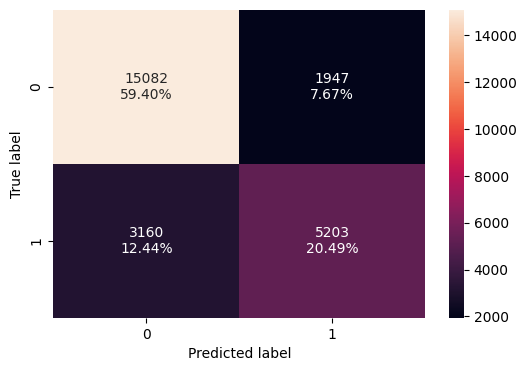

In [186]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [187]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.798874,0.622145,0.727692,0.670792


**Observations**

- The f1_score of the model is ~0.67 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [188]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                                 3.961279e+07
no_of_weekend_nights                         1.050307e+00
no_of_week_nights                            1.091266e+00
lead_time                                    1.372143e+00
arrival_year                                 1.435178e+00
arrival_month                                1.273729e+00
arrival_date                                 1.006523e+00
avg_price_per_room                           1.881548e+00
no_of_special_requests                       1.235526e+00
type_of_meal_plan_Meal Plan 2                1.263667e+00
type_of_meal_plan_Meal Plan 3                1.025023e+00
type_of_meal_plan_Not Selected               1.267547e+00
room_type_reserved_Room_Type 2               1.032519e+00
room_type_reserved_Room_Type 3               1.003285e+00
room_type_reserved_Room_Type 4               1.300120e+00
room_type_reserved_Room_Type 5               1.028277e+00
room_type_reserved_Room_Type 6       

* Sme categorical levels of `market_segment_type`, and `booking_label` exhibit high multicollinearity

**Dropping** `market_segment_type_Online`

In [189]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

no_of_adults                                 3.952654e+07
no_of_weekend_nights                         1.050077e+00
no_of_week_nights                            1.091236e+00
lead_time                                    1.365546e+00
arrival_year                                 1.432406e+00
arrival_month                                1.272339e+00
arrival_date                                 1.006521e+00
avg_price_per_room                           1.878098e+00
no_of_special_requests                       1.228129e+00
type_of_meal_plan_Meal Plan 2                1.263307e+00
type_of_meal_plan_Meal Plan 3                1.025023e+00
type_of_meal_plan_Not Selected               1.264818e+00
room_type_reserved_Room_Type 2               1.032414e+00
room_type_reserved_Room_Type 3               1.003285e+00
room_type_reserved_Room_Type 4               1.297708e+00
room_type_reserved_Room_Type 5               1.028277e+00
room_type_reserved_Room_Type 6       

- Now our model has very less multicollinearity. And we can proceed for removing variables having p value more than 0.05.

In [190]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False, method='bfgs')

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800725,0.623221,0.73192,0.673211


* No significant change in the model performance.

**Observations:**
1. Dropping `market_segment_type_Online` doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Some of the categorical levels of a variable have VIF< 5 which can simply be ignored.

In [191]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25363
Method:                           MLE   Df Model:                           28
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.3183
Time:                        14:26:58   Log-Likelihood:                -10969.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
no_of_adults                                 -0.0018     58.224  -3.09e-05      1.000    -114.118     114.114
no_of_weekend_nights                  

### Removing insignificant variables

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [192]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False,method='bfgs')

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_Yes']


In [193]:
X_train2 = X_train1[selected_features]

In [194]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False,method='bfgs')

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25379
Method:                           MLE   Df Model:                           12
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.3177
Time:                        14:27:05   Log-Likelihood:                -10979.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_weekend_nights               0.1283      0.019      6.604      0.000       0.090       0.166
lead_time                          0.0171      0.000     65.549      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

* Coefficient of some levels of meal plan, weekend night, lead time and avg price per room are positive an increase in these will lead to increase in chances of booking get cancelled.

* Coefficient of some levels of market segment types, room types, special request, arrival date, and repeated guests are negative increase in these will lead to decrease in chances of booking get cancelled.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [195]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,no_of_weekend_nights,lead_time,arrival_year,arrival_month,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 6,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
Odds,1.136909,1.017207,0.998577,0.941718,1.021210,0.222845,1.277619,1.429324,0.816957,0.656618,0.364047,0.156146,0.543502
Change_odd%,13.690875,1.720695,-0.142319,-5.828227,2.121029,-77.715516,27.761928,42.932419,-18.304271,-34.338166,-63.595252,-84.385427,-45.649777


**Coefficient interpretations**

* `arrival year`: Holding all other features constant a 1 unit change in the arrival year will decrease the odds of a booking gets canceled by ~1 times or a decrease of ~0.1% decrease in odds of a booking gets canceled.
* `arrival month`: Holding all other features constant a 1 unit change in the arrival year will decrease the odds of a booking gets canceled by ~0.94 times or a decrease of ~6% decrease in odds of a booking gets canceled.
* `Special requests`: Holding all other features constant a 1 unit change in the arrival year will decrease the odds of a booking gets canceled by ~0.22 times or a decrease of ~78% decrease in odds of a booking gets canceled.
* `Repeated guests`: Holding all other features constant a 1 unit change in the case of repeated guests will decrease the odds of a booking gets canceled by ~0.54 times or a decrease of ~46% decrease in odds of a booking gets canceled.
* `room type reserved`: The odds of a booking reserved for type 4 room having a cancellation is ~0.82 less than the booking which were done for other types (1-3,5) of rooms or ~18.3% fewer odds of cancellation than the booking which were done for other types of rooms. Similarly, a booking reserved for type 6 room having a cancellation is is ~0.65 times less than the booking which were done for other types of rooms or ~34.3% fewer odds of cancellation than the booking which were done for other types of rooms. [the dropped category type 1-3 and 5 is taken as a reference level]
* `market segment type`: The odds of a booking done at corporate market segment having cancellation of booking is ~0.36 times less than the booking which was done at online or complementary market segment having cancellation of booking or ~63.5% fewer odds of cancellation than the booking which were done at online or complementary market segment. Similarly, the odds of a booking done at offline market segment having cancellation of booking is ~0.15 times less than the booking which was done at online or complementary market segment having cancellation of booking or ~84.3% fewer odds of cancellation than the booking which were done at online or complementary market segment. [the dropped categories online and complementary are taken as a reference level]

**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

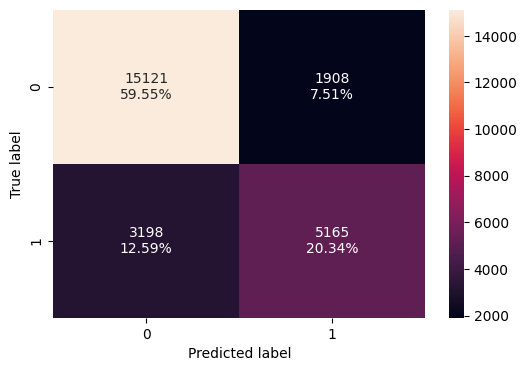

In [196]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [197]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.798913,0.617601,0.730242,0.669215


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [198]:
X_test2 = X_test[list(X_train2.columns)]

In [199]:
print(X_train2.columns)
print(X_test2.columns)

Index(['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 6',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'repeated_guest_Yes'],
      dtype='object')
Index(['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 6',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'repeated_guest_Yes'],
      dtype='object')


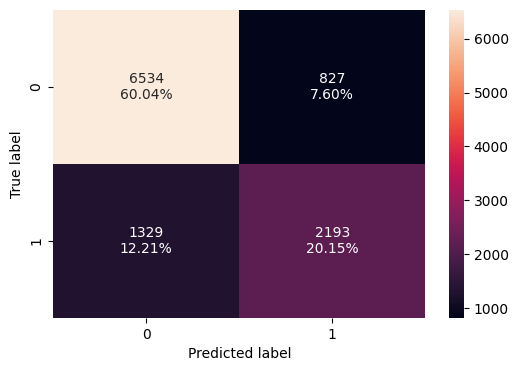

In [200]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test)

In [201]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.801893,0.622658,0.726159,0.670437


- The model is giving a good f1_score of ~0.67 on the train and test sets respectively.
- As the train and test performances are comparable, the model is not overfitting.
- Moving forward we will try to improve the performance of the model.

### Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

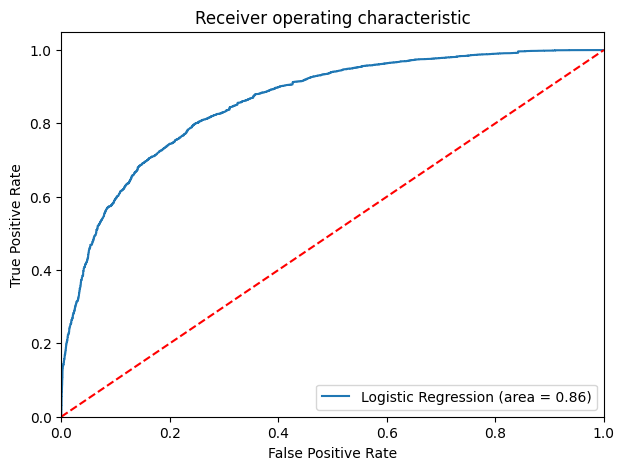

In [202]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [203]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2955693634213808


**Checking model performance on training set**

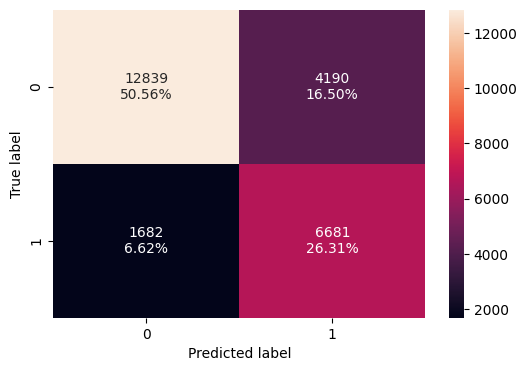

In [204]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [205]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.768746,0.798876,0.614571,0.694707


- Recall has increased, accuracy and precision has reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

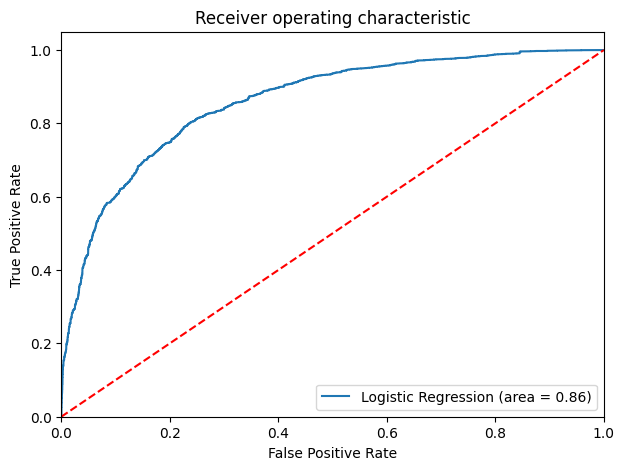

In [206]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

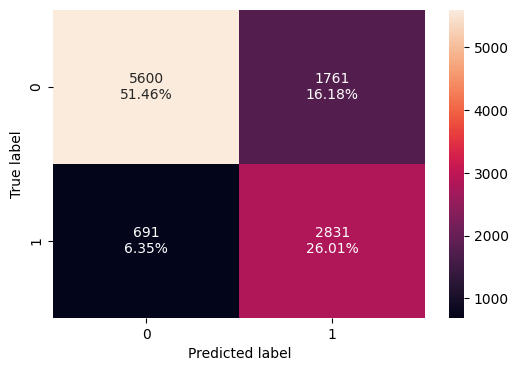

In [207]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [208]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.774694,0.803805,0.616507,0.697806


### Precision-Recall Curve

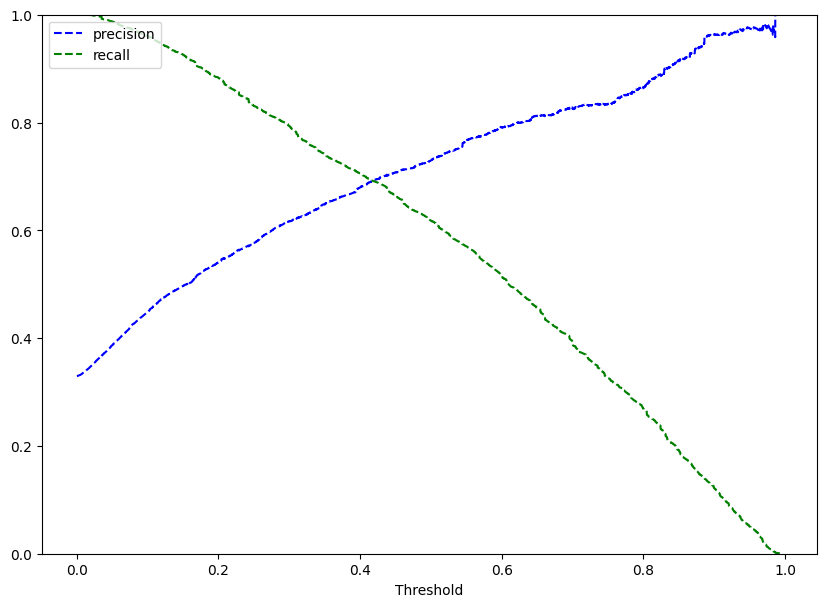

In [209]:
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [210]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

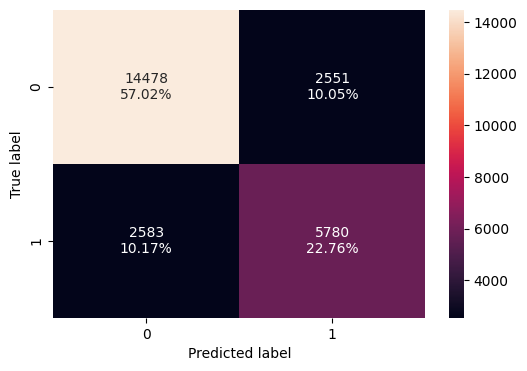

In [211]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [212]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79781,0.69114,0.693794,0.692464


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

**Checking model performance on test set**

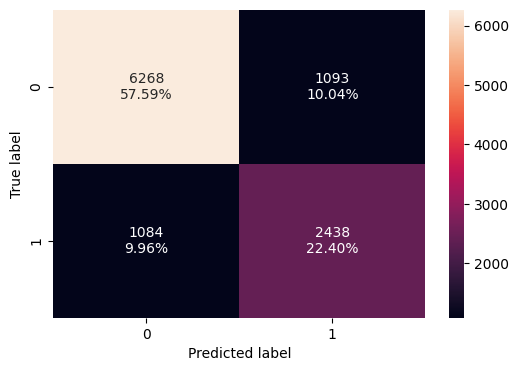

In [213]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [214]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.799963,0.69222,0.690456,0.691337


### Model Performance Comparison and Final Model Selection

In [215]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.81 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.81 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.798913,0.768746,0.797810
Recall,0.617601,0.798876,0.691140
Precision,0.730242,0.614571,0.693794
F1,0.669215,0.694707,0.692464


In [216]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.81 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.81 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.801893,0.774694,0.799963
Recall,0.622658,0.803805,0.692220
Precision,0.726159,0.616507,0.690456
F1,0.670437,0.697806,0.691337


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a threshold (0.81) is giving the best F1 score. Also, recall and precision are optimized. Therefore it can be selected as the final model.

# KNN Classifier

In [217]:

# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

X.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_label_Low,booking_label_Medium,booking_label_Very High,booking_label_Very Low,cancellation_label_Frequent Cancellations,cancellation_label_Moderate Cancellations,cancellation_label_No Cancellations
0,2.0,1.0,2.0,224.0,2017.0,10.0,2.0,65.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,3.0,5.0,2018.0,11.0,6.0,106.68,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,1.0,2018.0,2.0,28.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.0,2.0,211.0,2018.0,5.0,20.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1.0,1.0,48.0,2018.0,4.0,11.0,94.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Normalizing the numerical variables

In [218]:
num_columns = ['lead_time', 'avg_price_per_room']

In [219]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler

X[num_columns] = scaler.transform(X[num_columns])

In [220]:
X.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes,booking_label_Low,booking_label_Medium,booking_label_Very High,booking_label_Very Low,cancellation_label_Frequent Cancellations,cancellation_label_Moderate Cancellations,cancellation_label_No Cancellations
0,2.0,1.0,2.0,1.717432,2017.0,10.0,2.0,-1.198524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,3.0,-0.964558,2018.0,11.0,6.0,0.117100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,-1.013544,2018.0,2.0,28.0,-1.356349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,0.0,2.0,1.558227,2018.0,5.0,20.0,-0.093753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1.0,1.0,-0.437957,2018.0,4.0,11.0,-0.267360,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Train Test Split

In [221]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [222]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


## Model Building

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not get cancelled but in reality, the booking gets cancelled (FN)
- Predicting a booking will get cancelled but in reality, the booking does not cancell (FP)

**Which case is more important?**

- If we predict that a booking will not get cancelled but in reality, the guest cancels the booking, then the hotel company has to face losses due to cancellation of booking in following ways
    * The hotel cannot resell the room.

    * Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.

    * Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.

    * Human resources to make arrangements for the guests.

-	If we predict that a booking will get cancelled but in reality, the guest does not cancels the booking, then the company will have to bear the cost of inspection

    - Due to wrong prediction the booking will not take place and then hotel takecare cost will increase.
    

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [223]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [224]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### K- Nearest Neighbor

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

#### K=3

In [225]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

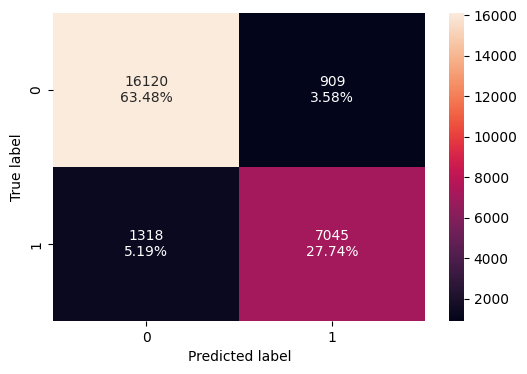

In [226]:
confusion_matrix_sklearn(knn_3, X_train, y_train)

In [227]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X_train, y_train
)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.912295,0.842401,0.885718,0.863517


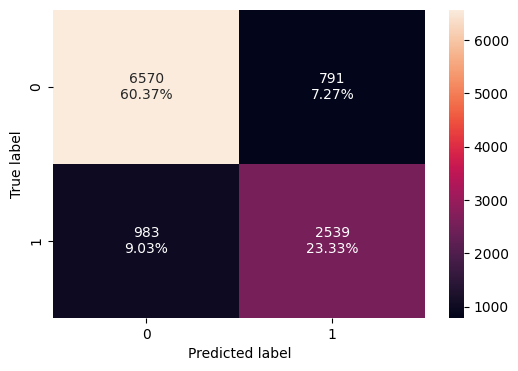

In [228]:
confusion_matrix_sklearn(knn_3, X_test, y_test)

In [229]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X_test, y_test
)
knn_perf_test_3

,Accuracy,Recall,Precision,F1
0,0.836993,0.720897,0.762462,0.741097


Let's run the KNN with no of neighbors to be 1,3,5..19 and find the optimal number of neighbors from the above list using the recall score

#### K with different values

In [230]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

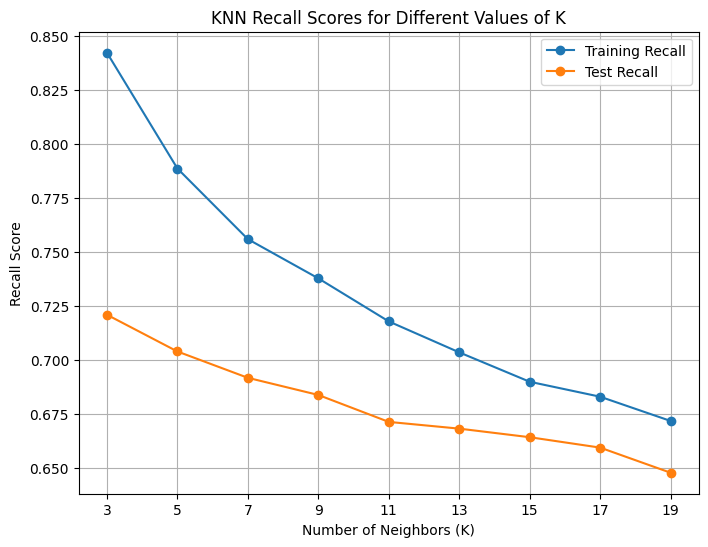

In [231]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

- The recall scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.

- As the value of k increases beyond 3, the recall scores tend to decrease for both training and test sets. This indicates a potential risk of the model not being able to identify the underlying patterns in the data.

- Therefore, based on the provided recall scores, k=3 appears to be the most suitable choice for balancing model performance between capturing positive instances effectively and generalizing well to new data.

### Naive Bayes

In [232]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

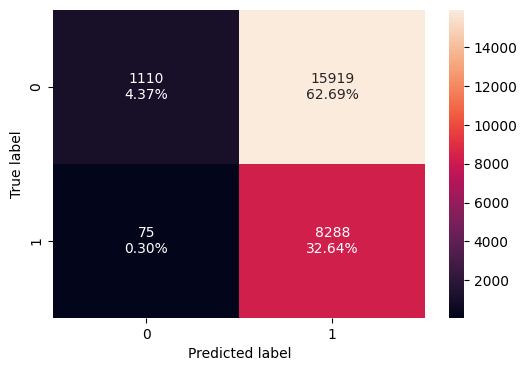

In [233]:
confusion_matrix_sklearn(nb, X_train, y_train)

In [234]:
nb_perf_train = model_performance_classification_sklearn(
    nb, X_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.370117,0.991032,0.34238,0.508935


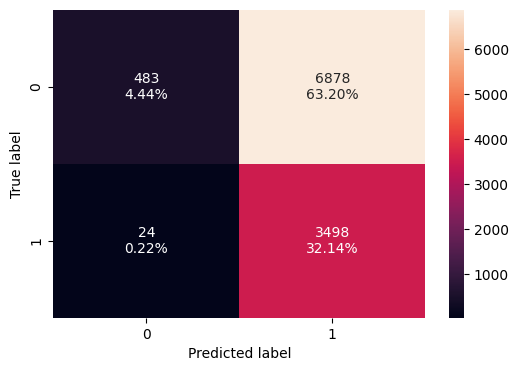

In [235]:
confusion_matrix_sklearn(nb, X_test, y_test)

In [236]:
nb_perf_test = model_performance_classification_sklearn(
    nb, X_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.3658,0.993186,0.337124,0.503382


## Comparison of Models and Final Model Selection

In [237]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        knn_perf_train_3.T,
        nb_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.912295,0.370117
Recall,0.842401,0.991032
Precision,0.885718,0.342380
F1,0.863517,0.508935


In [238]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        knn_perf_test_3.T,
        nb_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.836993,0.365800
Recall,0.720897,0.993186
Precision,0.762462,0.337124
F1,0.741097,0.503382


- In both the training and test sets, the K Nearest Neighbor model with k=3 demonstrates the highest recall among all compared models. This indicates that the model with k=3 is better at correctly identifying positive instances compared to the models with different k values and Naive Bayes.

- Naive Bayes consistently shows lower recall values compared to K Nearest Neighbor models with different k values. This suggests that Naive Bayes may struggle to capture positive instances as effectively as K Nearest Neighbor models in both training and test datasets, highlighting potential limitations in its performance for this specific task.

# Decision Tree (CERT)

In [239]:
df2=data.copy()

## Data Preprocessing

- We labeled no_of_booking_not_cancelled in four different groups
    * Very Low (count< 1)
    * Low (Count 1 to 5)
    * Medium (count 6 to 15)
    * High (count 15 to 30)
- Also we have labelled no_of_previous_cancellations in three different groups    
    * No Cancellations (Count = 0)
    * Few Cancellations (Count = 1 to 5)
    * Moderate Cancellations (Count = 6 to 10)
- We can drop 'no_of_children', 'required_car_parking_space', 'no_of_previous_cancellations', and 'no_of_previous_bookings_not_canceled' as most of the observations are 0 in these variables.
- 'Booking_ID' we can drop as it is a unique value no influence can be observed.
- There are many outliers in the data which we will treat (perform capping of outliers)
  - All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [240]:
# Define labeling function
def label_bookings(count):
    if count < 1:
        return 'Very Low'
    elif count <= 5:
        return 'Low'
    elif count <= 15:
        return 'Medium'
    elif count <= 30:
        return 'High'
    else:
        return 'Very High'

# Apply the labeling function to the dataframe
df2['booking_label'] = df2['no_of_previous_bookings_not_canceled'].apply(label_bookings)

In [241]:
# Define the function to label the data
def label_cancellations(row):
    if row['no_of_previous_cancellations'] == 0:
        return 'No Cancellations'
    elif row['no_of_previous_cancellations'] <= 5:
        return 'Few Cancellations'
    elif row['no_of_previous_cancellations'] <= 10:
        return 'Moderate Cancellations'
    else:
        return 'Frequent Cancellations'

# Apply the labeling function
df2['cancellation_label'] = df2.apply(label_cancellations, axis=1)

In [242]:
df2['repeated_guest'] = df2['repeated_guest'].map({0: 'No', 1: 'Yes'})

In [243]:
df2.drop(['no_of_children', 'Booking_ID', 'required_car_parking_space','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1, inplace=True)

## Outliers detection

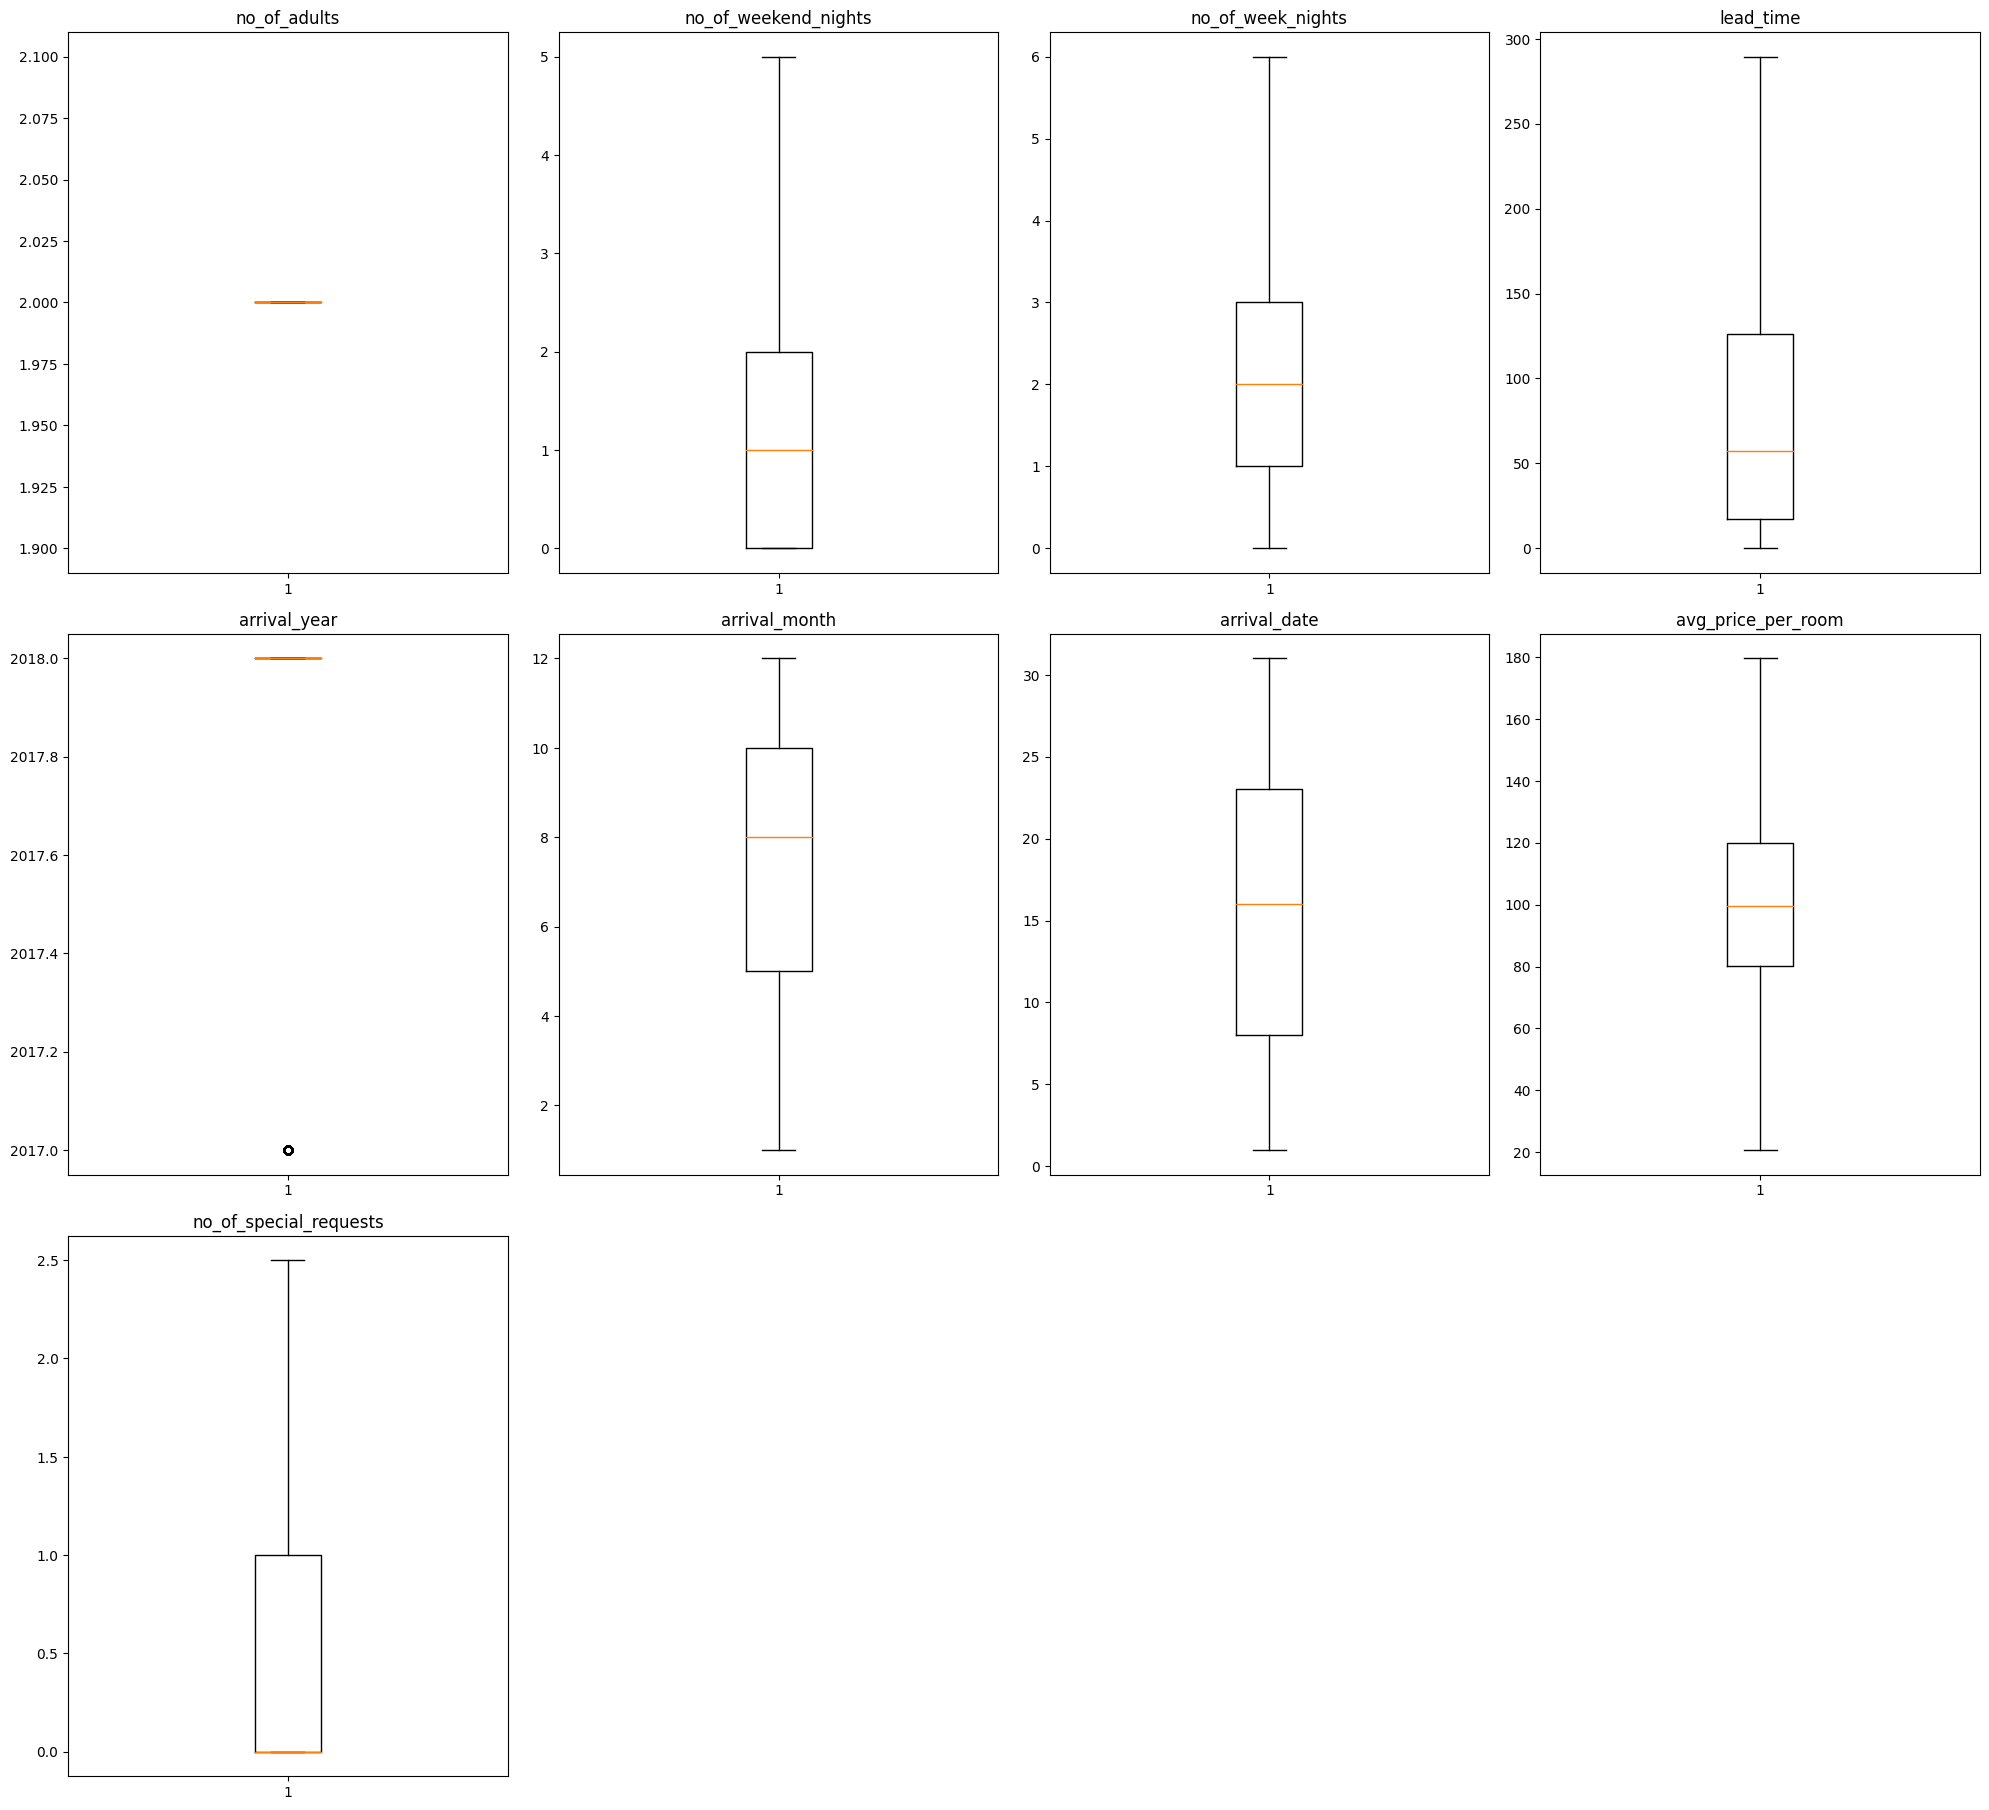

In [244]:
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

## Data Preparation for Modeling

In [245]:
df2["booking_status"] = df2["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [246]:
# specifying the independent  and dependent variables
X = df2.drop(["booking_status"], axis=1)
Y = df2["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [247]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 31)
Shape of test set :  (10883, 31)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


* We had seen that around ~67% of observations belongs to not canceled and ~33% observations belongs to canceled, and this is preserved in the train and test sets.

## Model Building

### Decision Tree (default)

In [248]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not get cancelled but in reality, the booking gets cancelled (FN)
- Predicting a booking will get cancelled but in reality, the booking does not cancell (FP)

**Which case is more important?**

- If we predict that a booking will not get cancelled but in reality, the guest cancels the booking, then the hotel company has to face losses due to cancellation of booking in following ways
    * The hotel cannot resell the room.

    * Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.

    * Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.

    * Human resources to make arrangements for the guests.

-	If we predict that a booking will get cancelled but in reality, the guest does not cancels the booking, then the company will have to bear the cost of inspection

    - Due to wrong prediction the booking will not take place and then hotel takecare cost will increase.
    

**How to reduce the losses?**

In [249]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [250]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

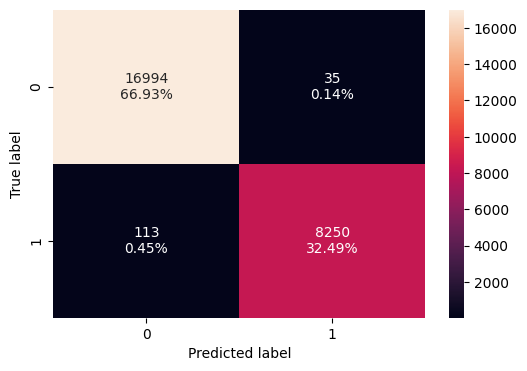

In [251]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [252]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.994171,0.986488,0.995775,0.99111


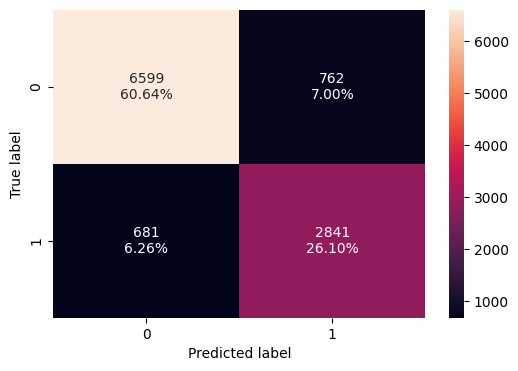

In [253]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [254]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.867408,0.806644,0.78851,0.797474


### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [255]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

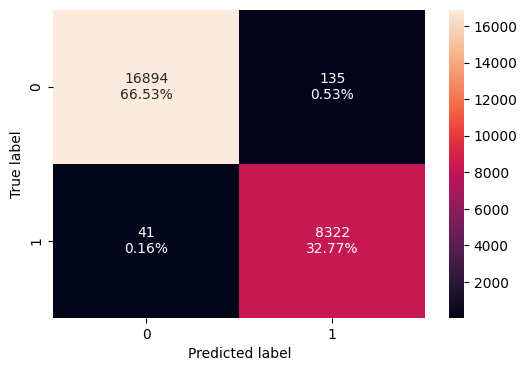

In [256]:
confusion_matrix_sklearn(model, X_train, y_train)

In [257]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.993069,0.995097,0.984037,0.989536


* Model is able to perfectly classify all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

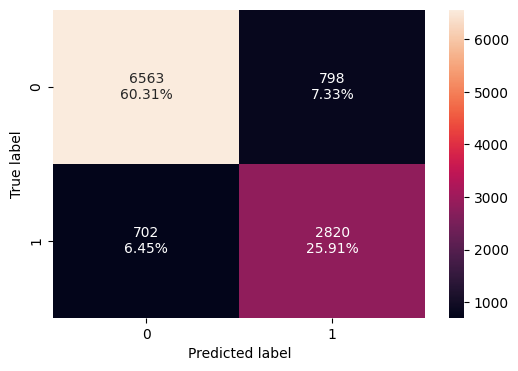

In [258]:
confusion_matrix_sklearn(model, X_test, y_test)

In [259]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86217,0.800681,0.779436,0.789916


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [260]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

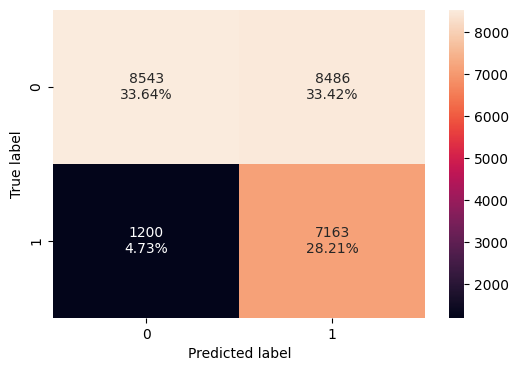

In [261]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [262]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.618541,0.856511,0.457729,0.596618


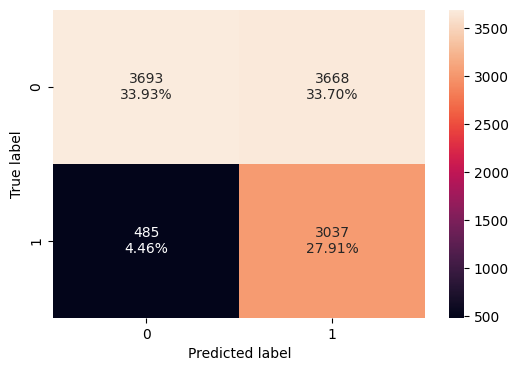

In [263]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [264]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.618396,0.862294,0.452946,0.593918


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

In [265]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

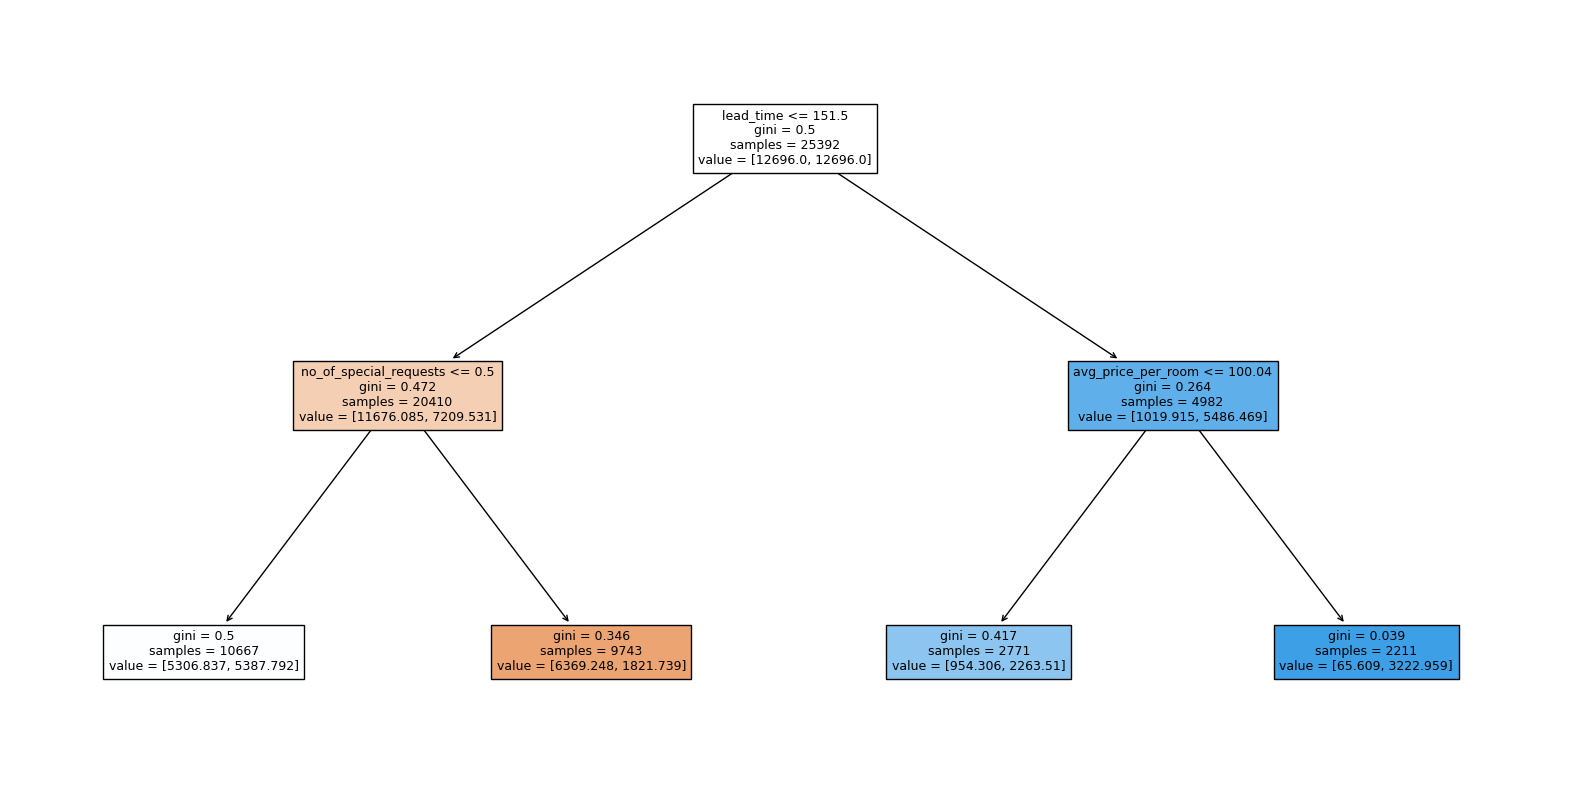

In [266]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [267]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.5, the number of special request is less than or equal to 0.50, and avg price per room is less than or equal to 100.04 then the booking is likely to get canceled.

`Interpretations from other decision rules can be made similarly`

In [268]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.67701797,
       0.        , 0.        , 0.        , 0.08174876, 0.24123327,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

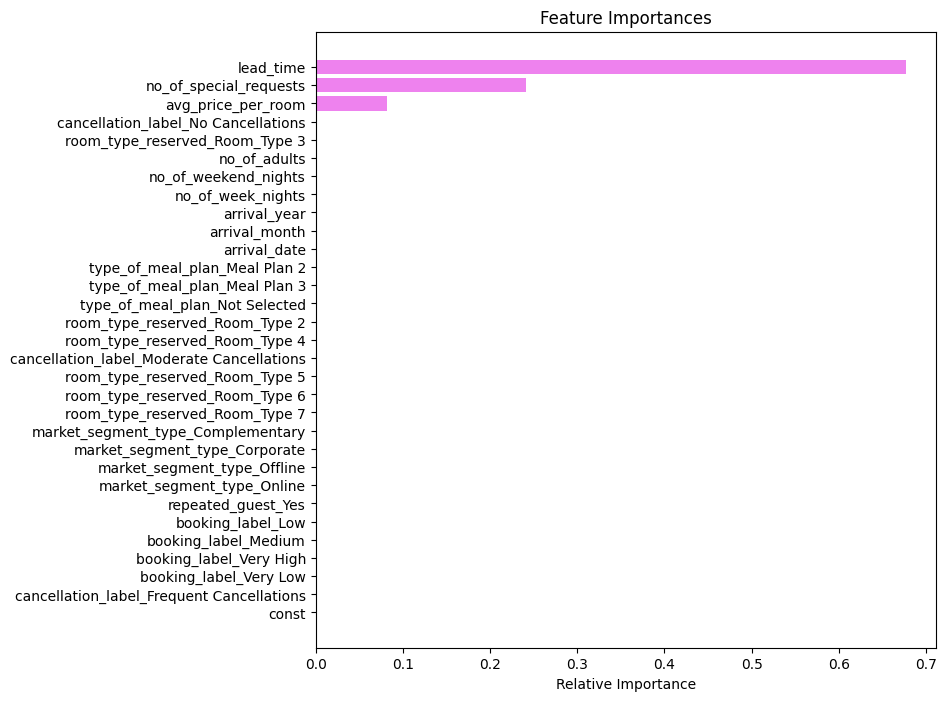

In [269]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre tuned decision tree also, lead time special request and room average price are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [270]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [271]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008415
1,0.000000e+00,0.008415
2,2.933821e-20,0.008415
3,2.933821e-20,0.008415
4,2.933821e-20,0.008415
...,...,...
1845,8.901596e-03,0.328058
1846,9.802243e-03,0.337860
1847,1.271875e-02,0.350579
1848,3.412090e-02,0.418821


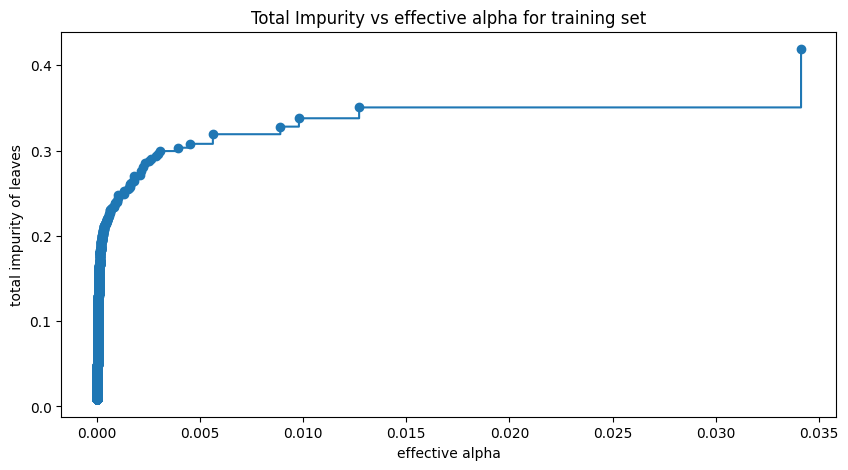

In [272]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [273]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137032


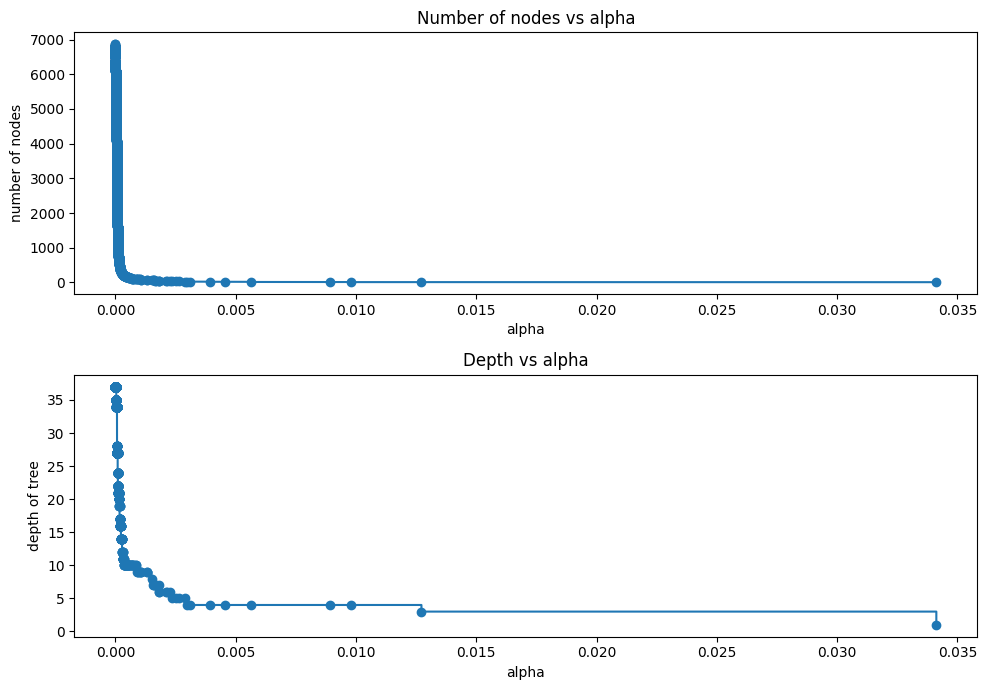

In [274]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [275]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [276]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [277]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

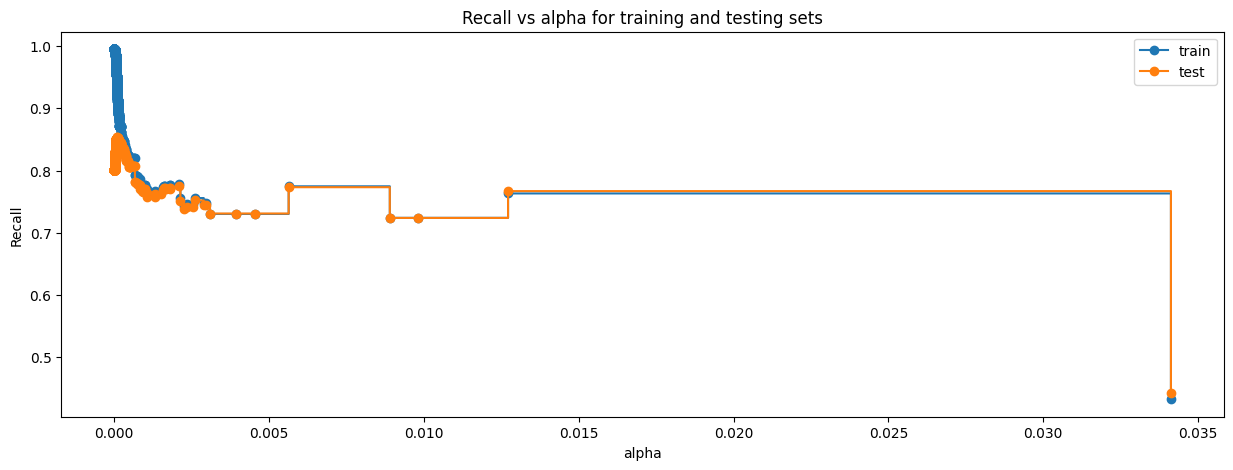

In [278]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [279]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=9.648231815018171e-05, class_weight='balanced',
                       random_state=1)


0.00009648231815018171

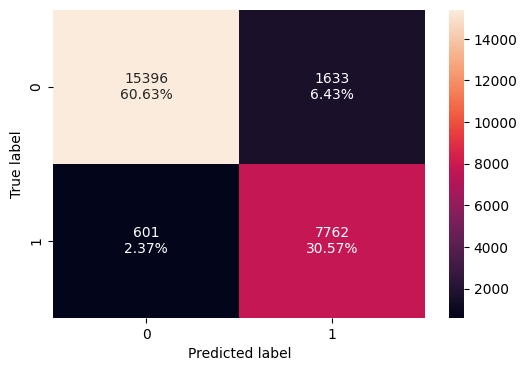

In [280]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [281]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.91202,0.928136,0.826184,0.874198


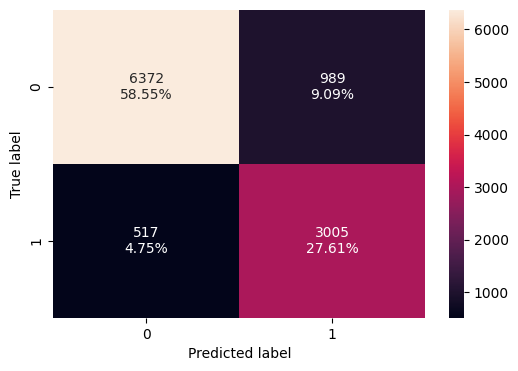

In [282]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [283]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.861619,0.853208,0.752379,0.799627


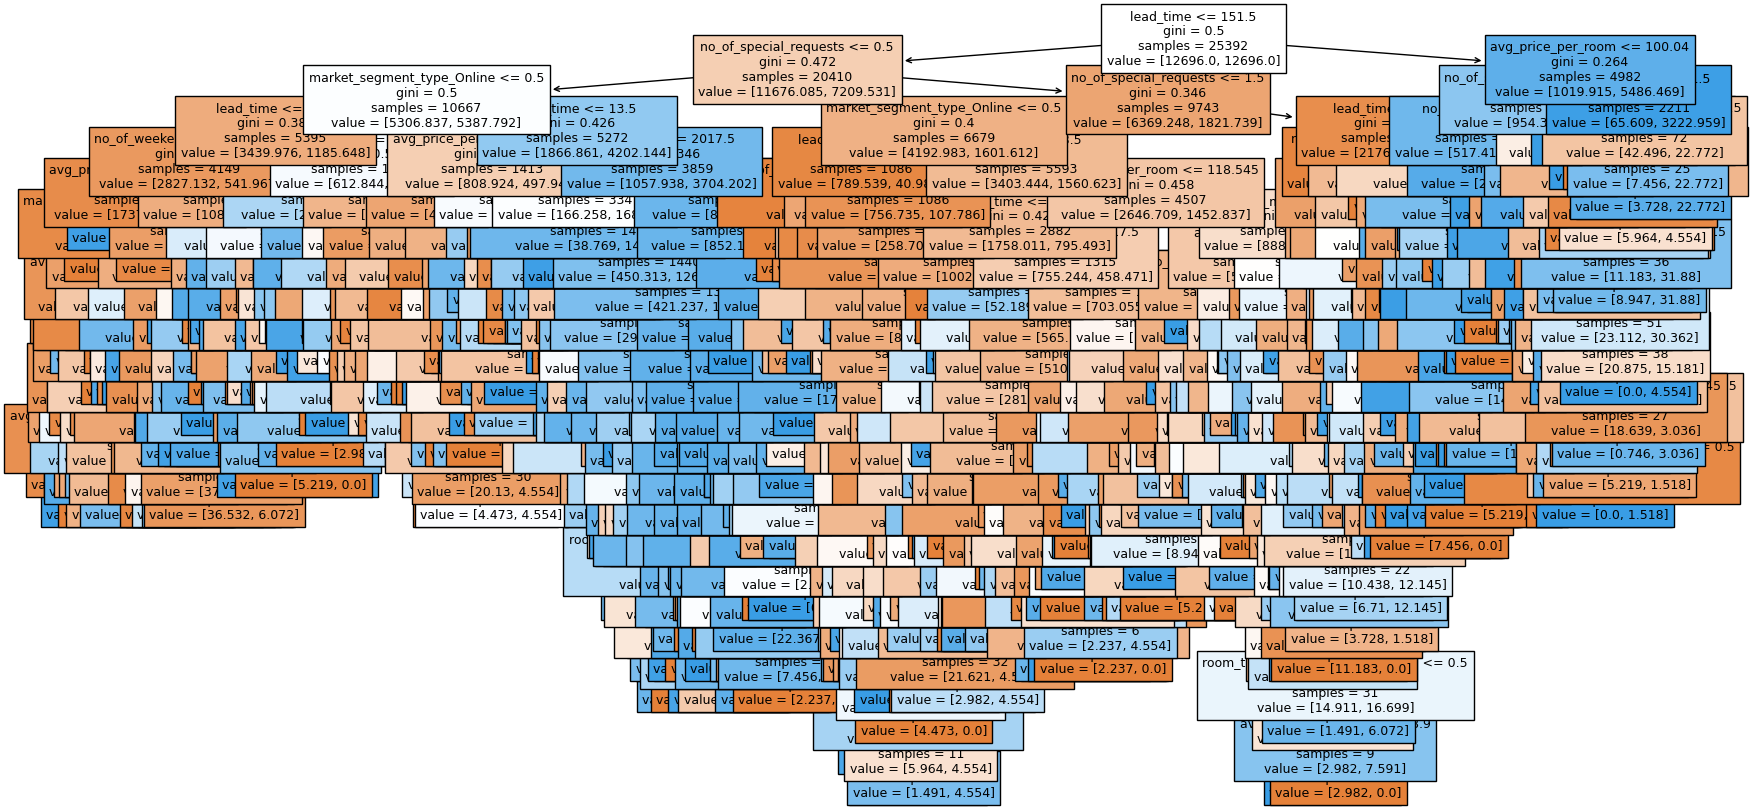

In [284]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [285]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

**Observations from the post-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

- If the lead time is less than or equal to 151.5, the number of special request is less than or equal to 0.50, and market segment type online is less than or equal to 0.50 then the booking is likely to get canceled.

In [286]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

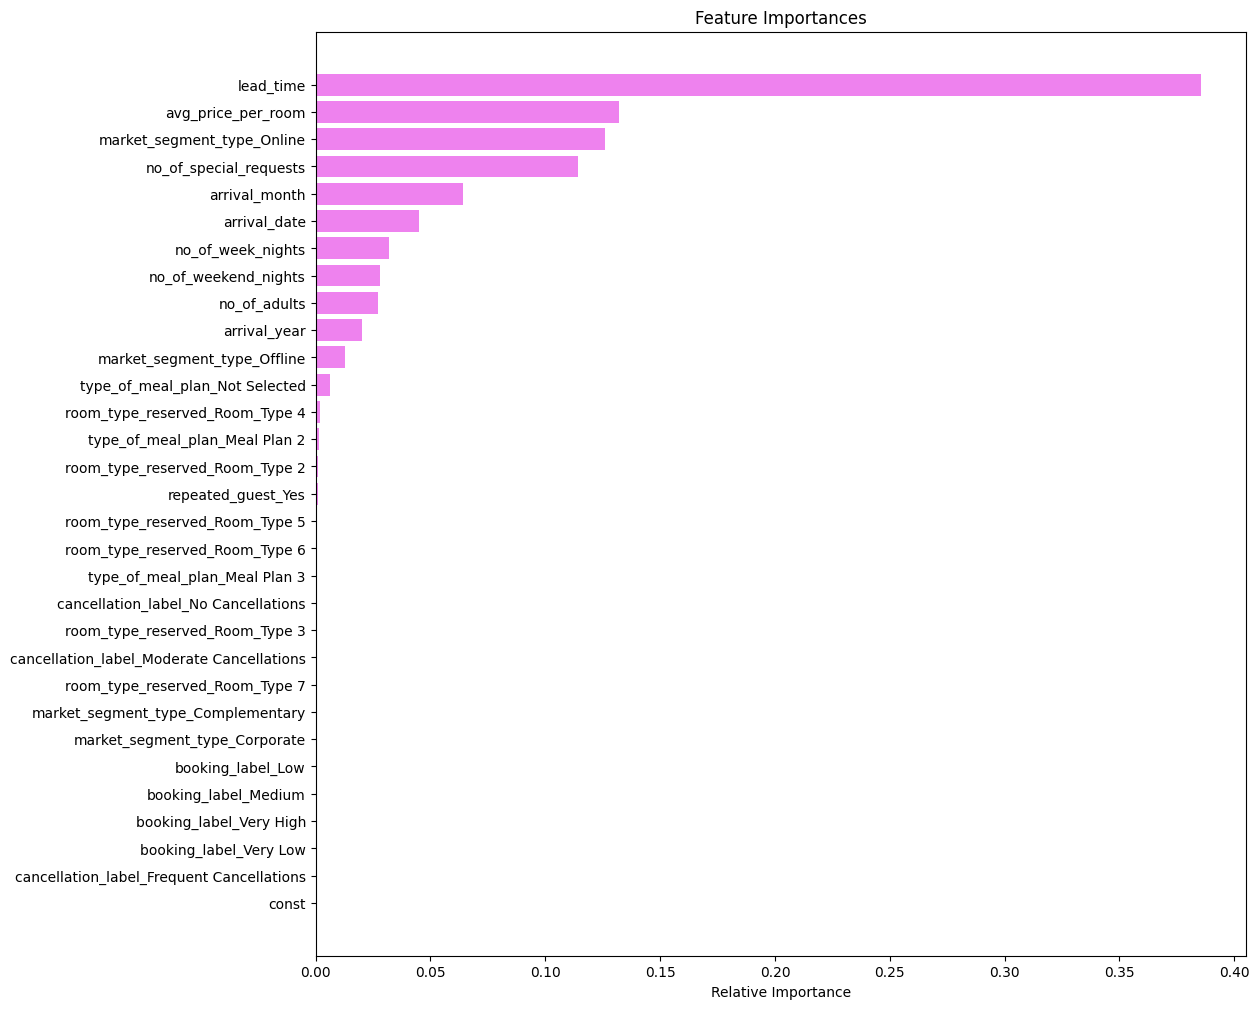

In [287]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time, avg price per room, online market segment type, and special requests are the main features of the post-pruned tree.

## Comparison of Models and Final Model Selection

In [288]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994171,0.993069,0.618541,0.912020
Recall,0.986488,0.995097,0.856511,0.928136
Precision,0.995775,0.984037,0.457729,0.826184
F1,0.991110,0.989536,0.596618,0.874198


In [289]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.867408,0.862170,0.618396,0.861619
Recall,0.806644,0.800681,0.862294,0.853208
Precision,0.788510,0.779436,0.452946,0.752379
F1,0.797474,0.789916,0.593918,0.799627


- The most effective decision tree was achieved using the post-pruning method. It demonstrated significant recall and precision, with differences between the train and test data within a 10% margin.

# All Models Comparison

In [290]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
		log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        knn_perf_train_3.T,
        nb_perf_train.T,
		    decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
	  "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.81 Threshold",
    "Logistic Regression-0.42 Threshold",
    "K Nearest Neighbor k=3",
    "Naive Bayes",
	  "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.81 Threshold,Logistic Regression-0.42 Threshold,K Nearest Neighbor k=3,Naive Bayes,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.798913,0.768746,0.797810,0.912295,0.370117,0.994171,0.993069,0.618541,0.912020
Recall,0.617601,0.798876,0.691140,0.842401,0.991032,0.986488,0.995097,0.856511,0.928136
Precision,0.730242,0.614571,0.693794,0.885718,0.342380,0.995775,0.984037,0.457729,0.826184
F1,0.669215,0.694707,0.692464,0.863517,0.508935,0.991110,0.989536,0.596618,0.874198


In [291]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
		log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        knn_perf_test_3.T,
        nb_perf_test.T,
		    decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,

    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.81 Threshold",
    "Logistic Regression-0.42 Threshold",
	  "K Nearest Neighbor k=3",
    "Naive Bayes",
	  "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",

]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.81 Threshold,Logistic Regression-0.42 Threshold,K Nearest Neighbor k=3,Naive Bayes,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.801893,0.774694,0.799963,0.836993,0.365800,0.867408,0.862170,0.618396,0.861619
Recall,0.622658,0.803805,0.692220,0.720897,0.993186,0.806644,0.800681,0.862294,0.853208
Precision,0.726159,0.616507,0.690456,0.762462,0.337124,0.788510,0.779436,0.452946,0.752379
F1,0.670437,0.697806,0.691337,0.741097,0.503382,0.797474,0.789916,0.593918,0.799627


# Business recommendations

### **1. Lead Time Management**

* **Encourage Shorter Lead Times:** Since it is evident that a longer lead time might enhance the chances of cancellations, consider offering a discount or incentive for those making bookings closer to the check-in date, which includes last-minute deals and promotions targeting spontaneous travelers.

- **Flexible Booking Policies:** Offer flexible cancellation policies for long lead time bookings to minimize cancellations. For example, offer free cancellations up until a particular point closer to the check-in date.

### **2. Optimise Your Booking Channels**

- **Promotion of Offline Channels:** Since offline bookings generally have a lower cancellation rate, you can encourage more bookings through this channel. You accomplish this by offering special offline discounts or by tying up with some local travel agencies.

- **Improve Online Booking Experience**: Improve the online booking experience to reduce cancellations. This can be done by providing more customer support, clearly stating the cancelation policies, and providing some additional offers on holding bookings.

### **3. Repeat Guest Retention**

- **Loyalty Programs:** Refine or develop loyalty programs that would increase repeat bookings with benefits like discounts, room upgrades, or additional services for loyal customers—lowering their chances of canceling.

- **Personalized Marketing:** Based on the data collected regarding prior bookings, more emphasis should be given to repeat guests by designing personalized marketing campaigns and emphasizing the special benefits given to loyal customers.

### **4. Special Requests Handling**

- **Encourage Special Requests:** Since bookings with special requests are much less often canceled, it is important to motivate guests to make special requests. Make this an option at time of booking and accommodation of such requests very good.

- **Better Customer Service:** Train staff to effectively handle special requests and follow up with guests to ensure all their requirements are being met, which would help in reaffirming the guest's commitment to the booking.

### **5. Pricing Strategies**

- **Competitive Pricing**: Monitoring and changing the cost of the rooms to be competitive, especially for online bookings where price is more sensitive. Then there is dynamic pricing to optimize on occupancy and minimize cancellations.

- **Price Guarantees:** Provide price guarantees to reduce cancellations triggered by price change. Give confidence that the guests are receiving the optimum price.

### **6. Seasonal Promotion**

- **Low Season Bookings:** Try to have more promotion during January and February months, which contribute the most to the lowest number of arrivals. This could include special winter packages or themed events.

- **Manage High-Season Demand:** Especially in peak months, such as October, make sure policies are in place to minimize cancellations through more stringent cancellation policies or nonrefundable rates.

### **7. Data-Driven Decision Making**

- **Regular Analysis:** Keep a constant view of the booking data, looking for trends, and adjust strategies accordingly. Run prediction models that look out for cancellations so proactive measures may be taken against them.

- **Feedback Loop:** Design a system to take feedback from people who are not going to arrive, especially from canceling guests, in order to understand the reasons behind it and make any necessary changes to the booking process for future guests.

### **8. Enhance Communication**

- **Pre-Arrival Engagement:** Engage more before the guests' arrival to confirm their stay and raise/redress concerns that may lead to cancellations. These may involve emails, texts, or even calls.

- **Transparency of Policies**: The cancellation policies ought to be clearly stated at the point of reservation so as to have as minimal a level of misunderstanding as possible, which could in turn reduce last-minute cancellations.

If these suggestions are followed by the INN hotels, then the cancellations would significantly drop and eventually work on more efficient booking procedures while satisfying guests.

---